# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [3]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Loading the dataset
df = pd.read_csv('/content/drive/My Drive/INNHotelsGroup.csv')

In [6]:
# creating a copy of the dataset
df1= df.copy()


Data Overview

Viewing the first and last few rows of the dataset

Checking the shape of the dataset

Getting the statistical summary for the variables

In [5]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [6]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


### Data Shape

In [7]:
# checking the shape of the dataset to see column and rows
df.shape[0]
df.shape[1]
print ('There are', df.shape[0], 'rows', df.shape[1],'columns in the dataset')

There are 36275 rows 19 columns in the dataset


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [9]:
# checking to see if there are any missing values
df.isnull().values.any()

False

There are no missing values in the dataset

In [10]:
# Checking data info for duplicates
df.duplicated().sum()


0

There are no duplicates in the dataset

In [11]:
# checking for unique values
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

### Observation:

The Booking_ID column has the whole count of the dataset as unique value, therefore we will need to drop the Booking_ID column

The repeated guest column has two unique variable: Either Yes (1) or No (0)
The type of meal plan has 4 different unique values and there are 2 years data under analysis in the dataset

In [12]:
# Getting the statistical summary of the dataset
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.00000,NaN,NaN,NaN,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,NaN,NaN,NaN,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,NaN,NaN,NaN,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,NaN,NaN,NaN,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.00000,NaN,NaN,NaN,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.00000,NaN,NaN,NaN,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,NaN,NaN,NaN,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000




*   The booking Id is a unique value common to all guests
*   no_of_adult: 25%-75% of guest are two adults but there are cases where 4 maximum adults booked a room


*  no_of_week_night: Average weekend stayed is 1 and average week night stayed is 2. There is a huge difference in the 75th percentile and maximum value of no_of_week_night (3,17) indicating the presence of outliers


* no_of_children  Average guests don't bring children but outliers of 10 max children guest are present in the data set
*  lead_time: Average number of days between date of booking and the arrival date is 85days (almost 3 months) and 75 percentile standing at 126 days and maximum at 443 days(more than a year) Further analysis required to observe if lead time is related to churn rate


*   avg_price_per_room: average price per room is 103 Euro where min price is 80Euro and maximum stands at 540Euros, there are few no_of_special_request with a max number of 5








In [13]:
#Feature Engineering - Drop the Booking_ID column

df1.drop('Booking_ID', axis =1,inplace=True)

In [14]:
# checking again the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

The booking Id is dropped

In [15]:
#Analysing the column of interest:booking_status
# checking the value counts for each unique value in "booking_status" column
df1["booking_status"].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

33% of bookings are cancelled in the dataset

## Data Overview

- Observations
- Sanity checks

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Univarite Analysis

In [16]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="yellow"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

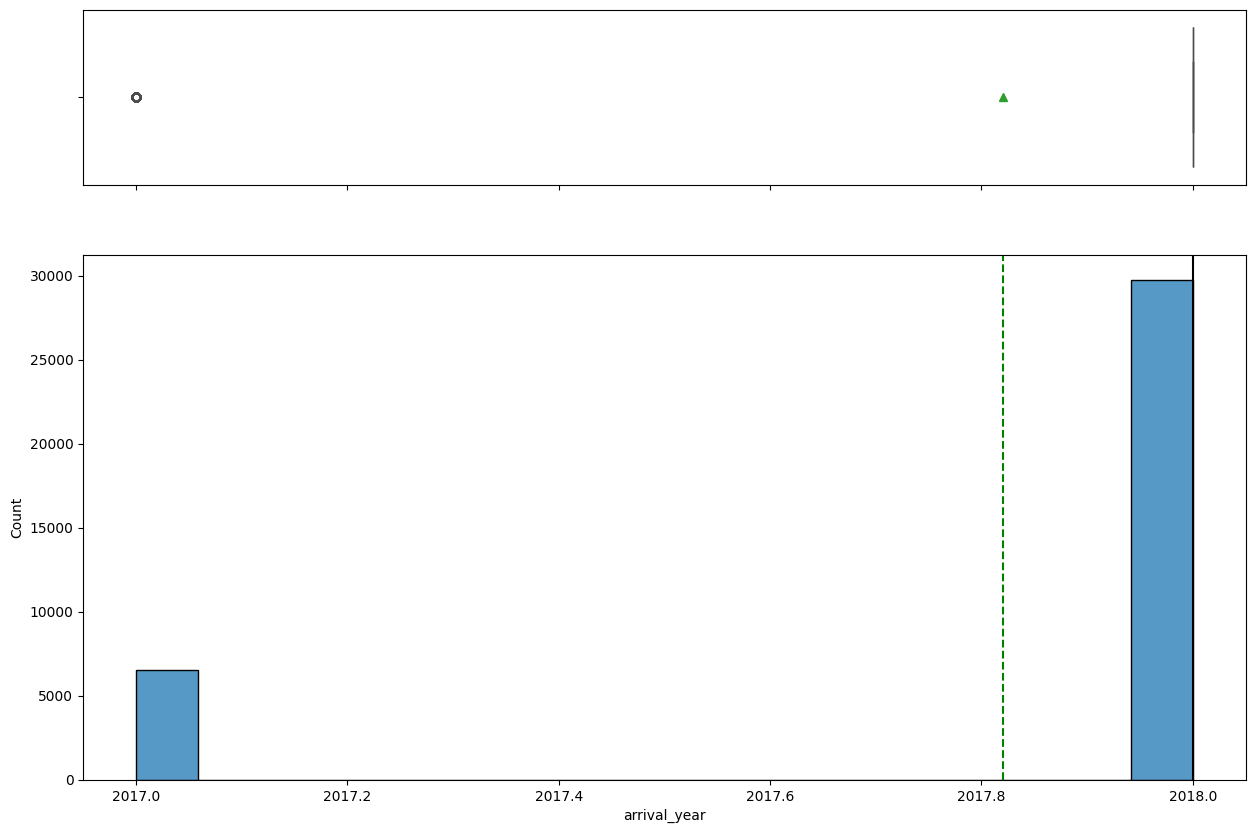

In [18]:
#analysing arrival_year
histogram_boxplot(df1, "arrival_year")

There are 2 distinct year in the dataset: 2017 and 2018

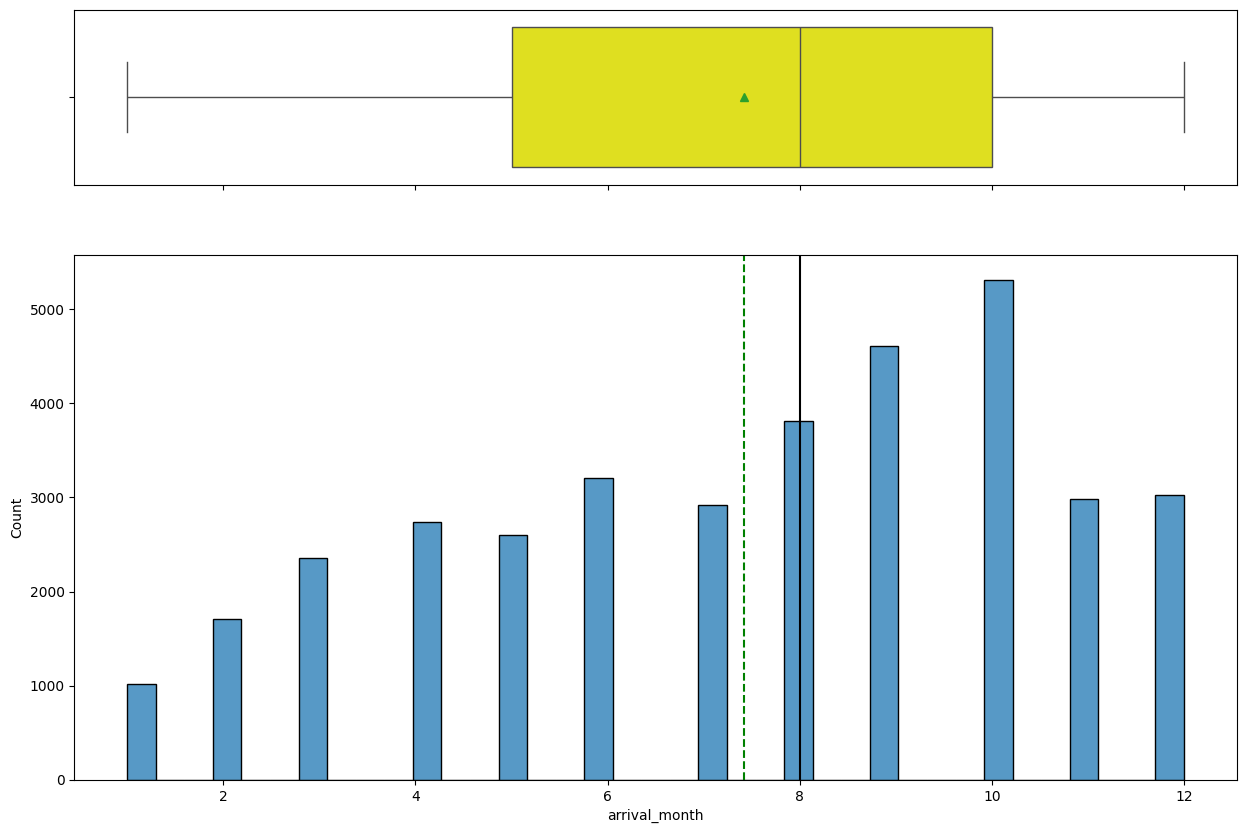

In [19]:
#analysing arrival month
histogram_boxplot(df1, "arrival_month")

October is the month with the highest count

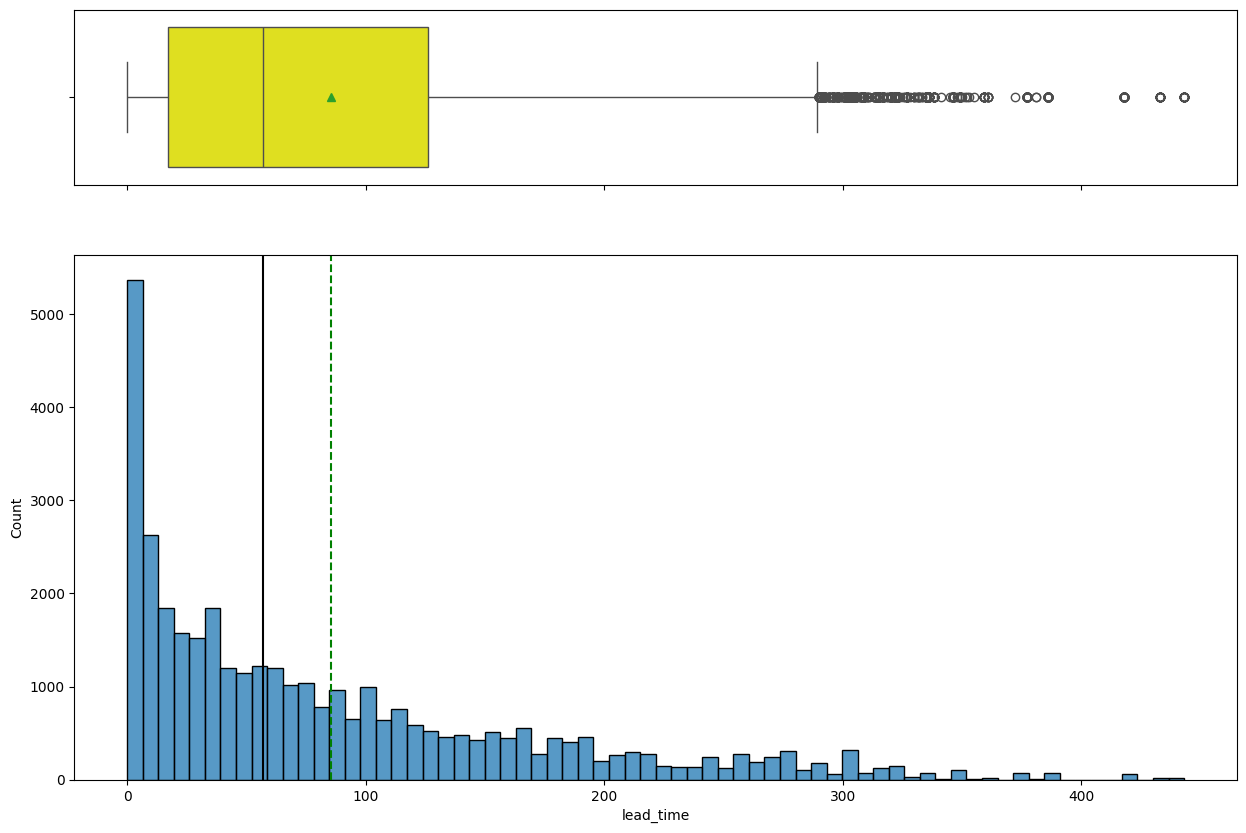

In [20]:
#analysing lead_time
histogram_boxplot(df1, "lead_time")

Lead time for around 5200 bookings, 14% of the data set is between maybe 0-10 days

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

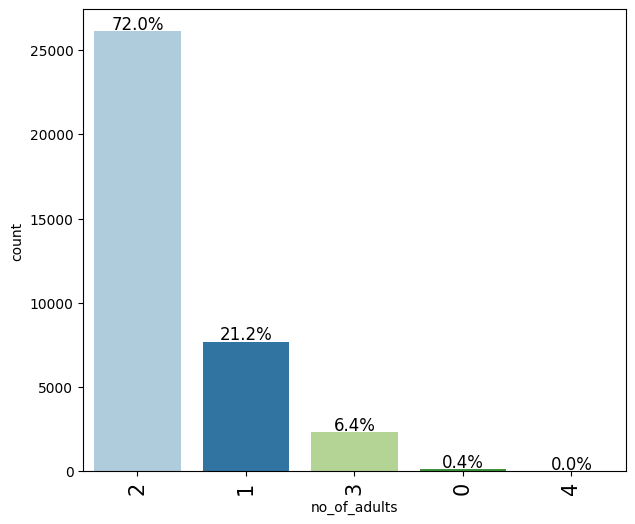

In [22]:
labeled_barplot(df1, "no_of_adults", perc=True)

Couples or 2 adults have the highest count of 72%

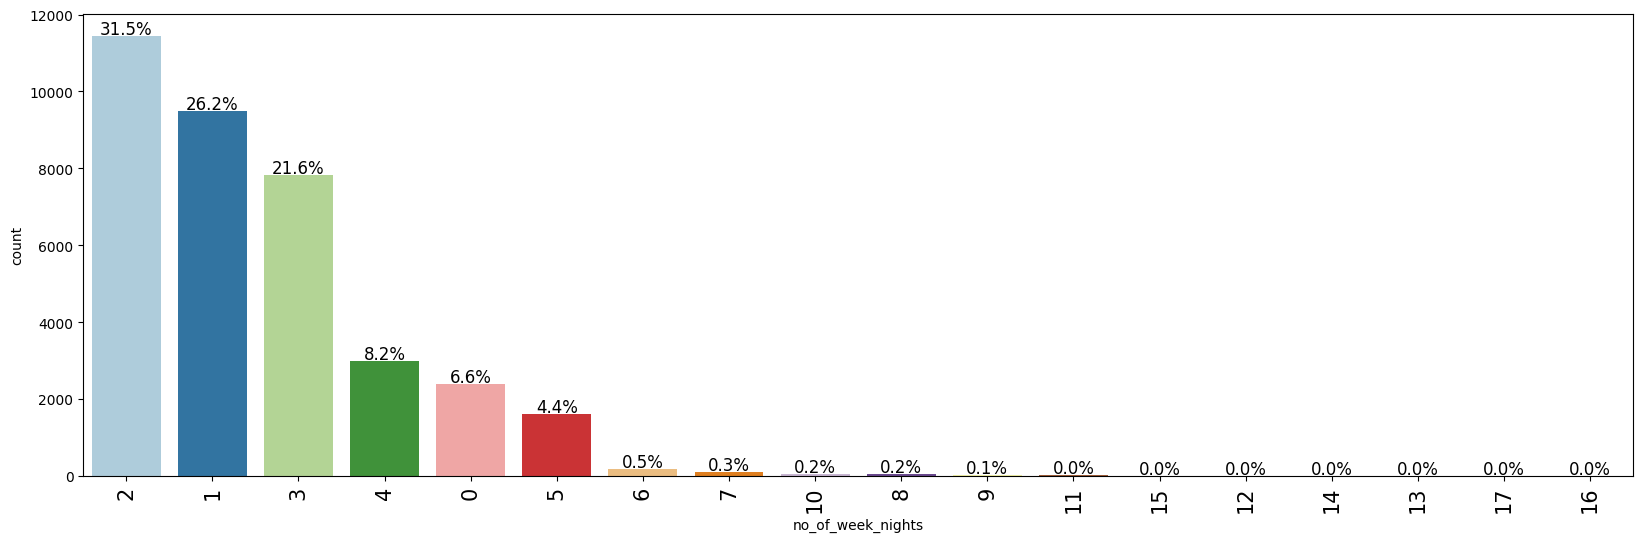

In [23]:
labeled_barplot(df1, "no_of_week_nights", perc=True)

31.5% of the bookings stay is 2 nights

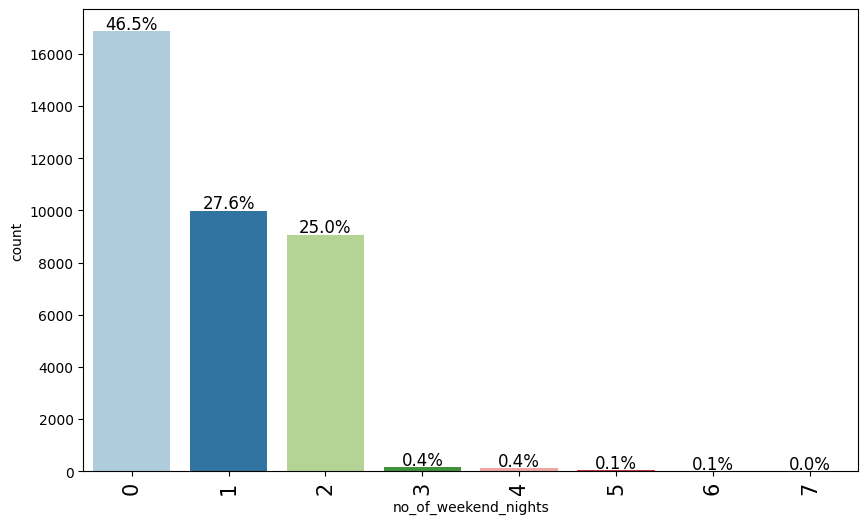

In [24]:
labeled_barplot(df1, "no_of_weekend_nights", perc=True)

46.5% of the data set have zero weekend nights with 27.6% and 25% staying 1 and 2 weekend night respectively

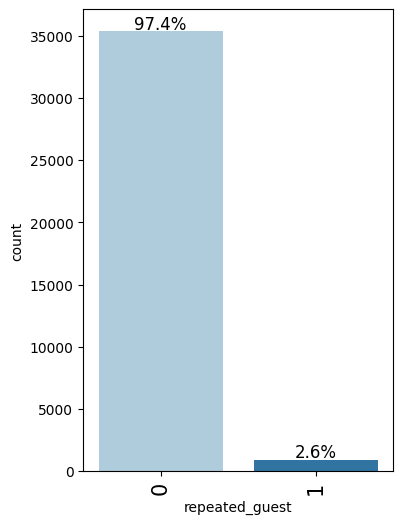

In [25]:
labeled_barplot(df1, "repeated_guest", perc=True)

Only 2.6% of the guests at the hotel are repeated guests

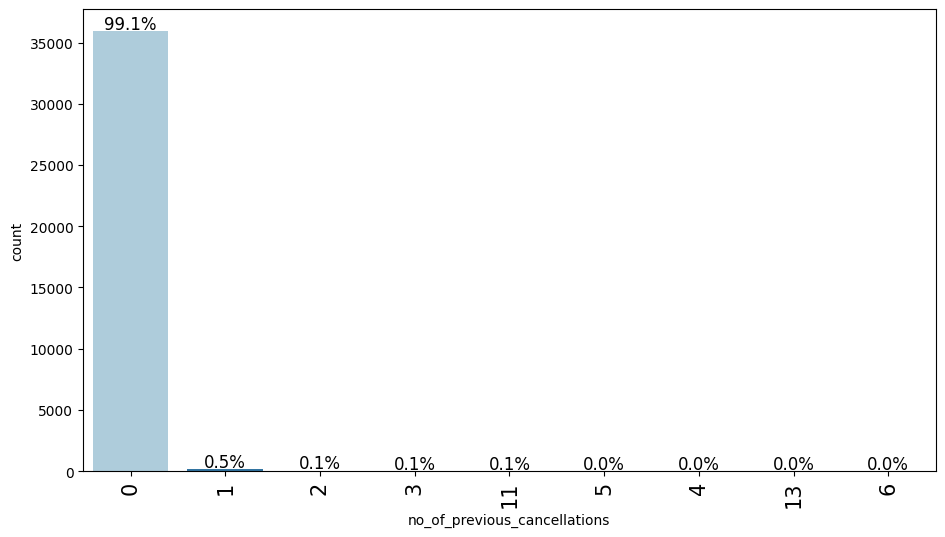

In [26]:
labeled_barplot(df1, "no_of_previous_cancellations", perc=True)

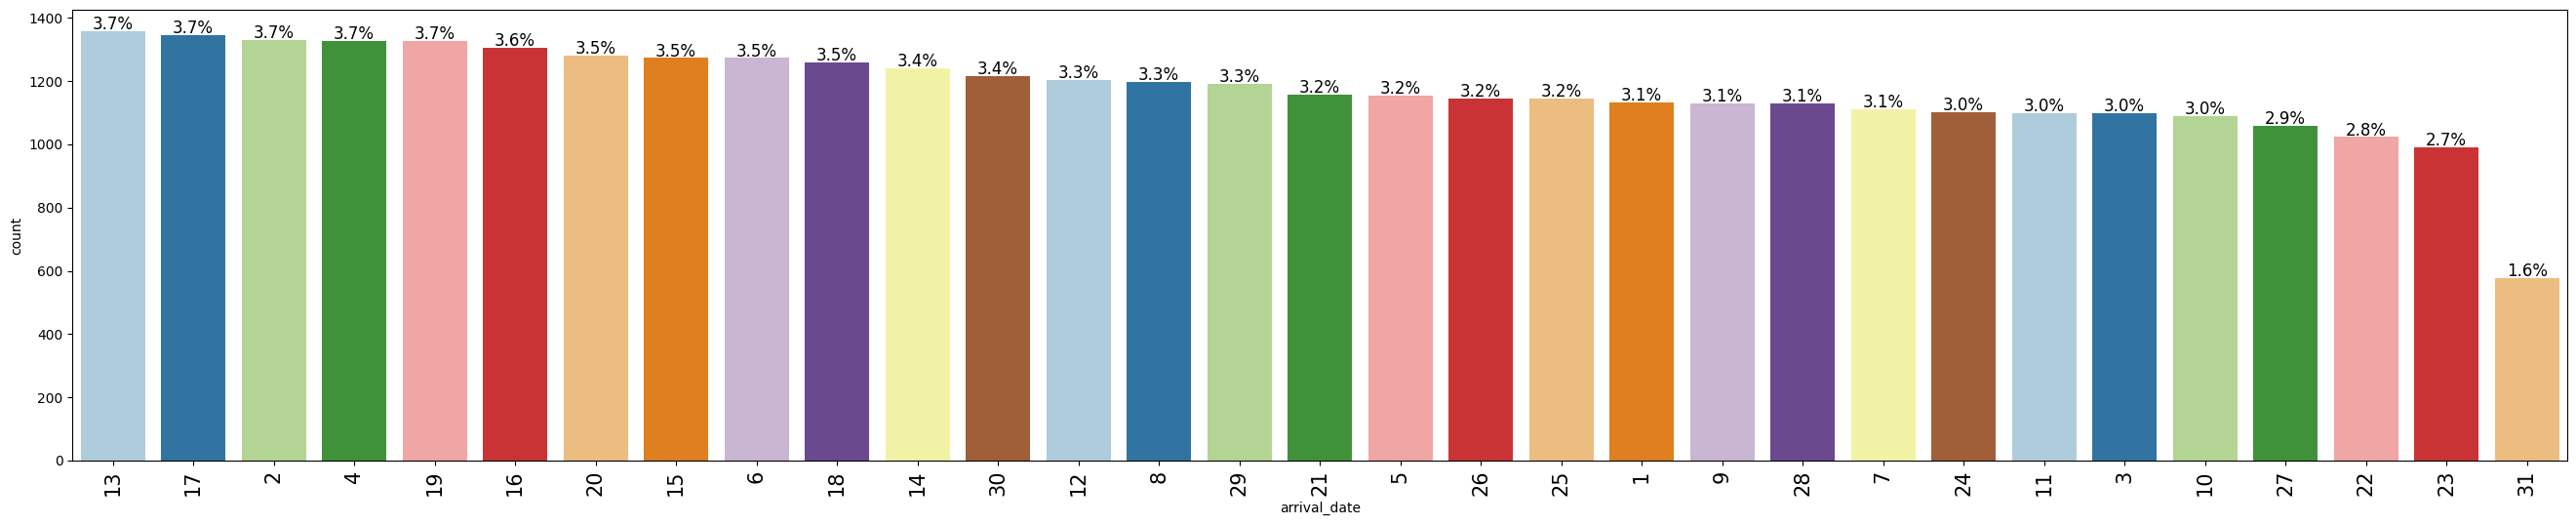

In [27]:
labeled_barplot(df1, "arrival_date", perc=True)

Count for 31st day of the month is lower because only 7 monthsin a year has 31 days per month

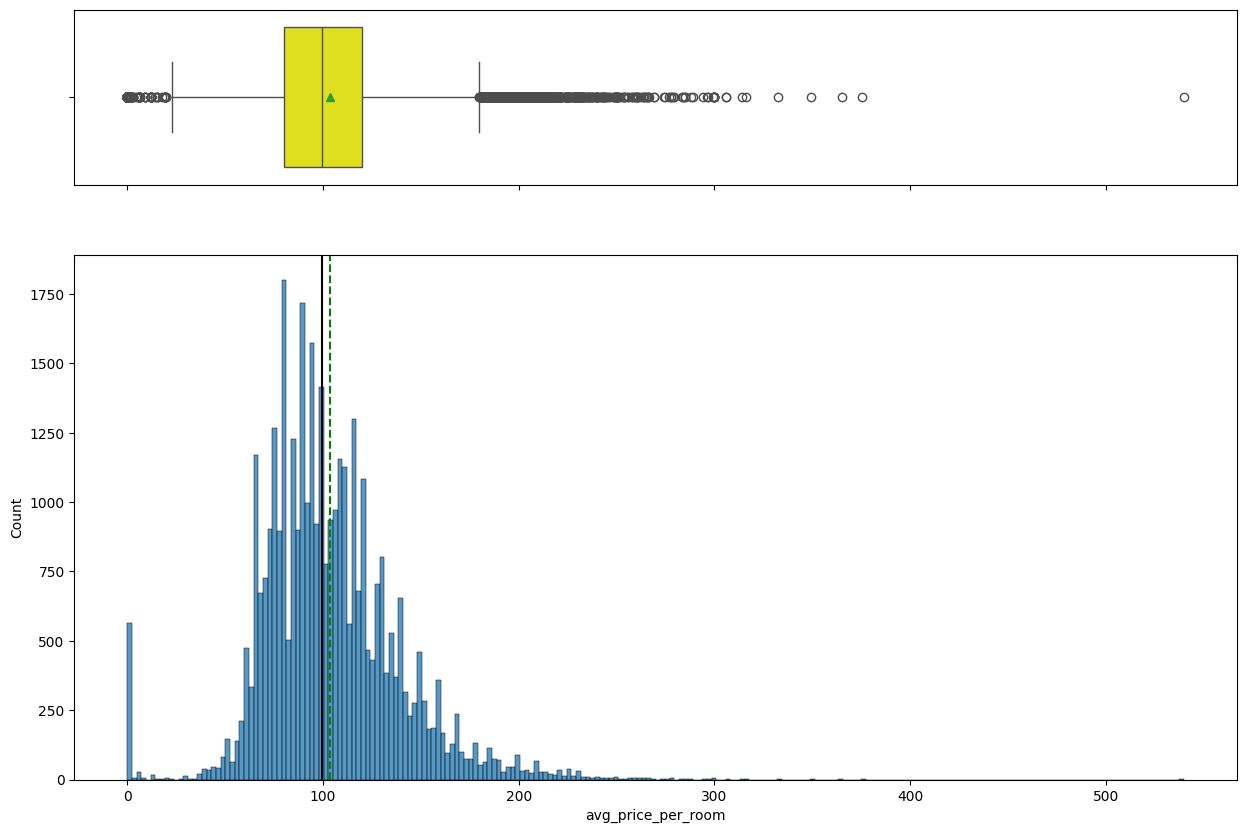

In [28]:
histogram_boxplot(df1, "avg_price_per_room")

##Observation:
Average room prices seems to have the range of 70 Euros to 240 Euros and there are outliers at the lower and upper whisker that may be treated

Mean average room price is almost at 110 Euros

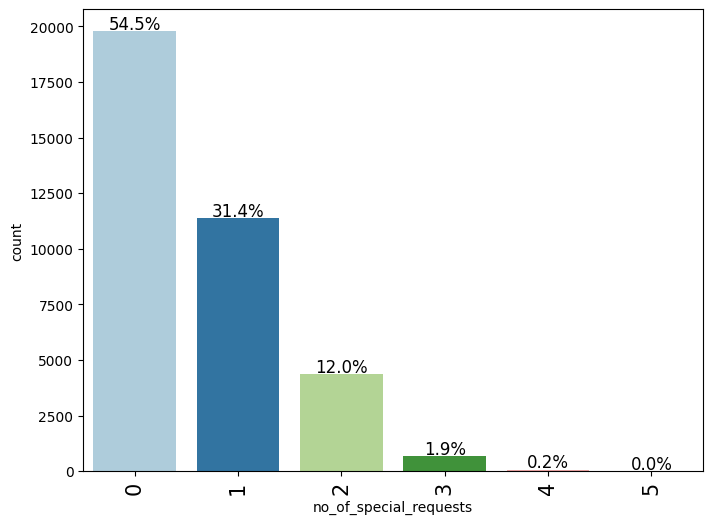

In [29]:
labeled_barplot(df1, "no_of_special_requests", perc=True)

31.4%  made special request, Further analysis is required to know if there is any correlation between special request and booking not cancelled

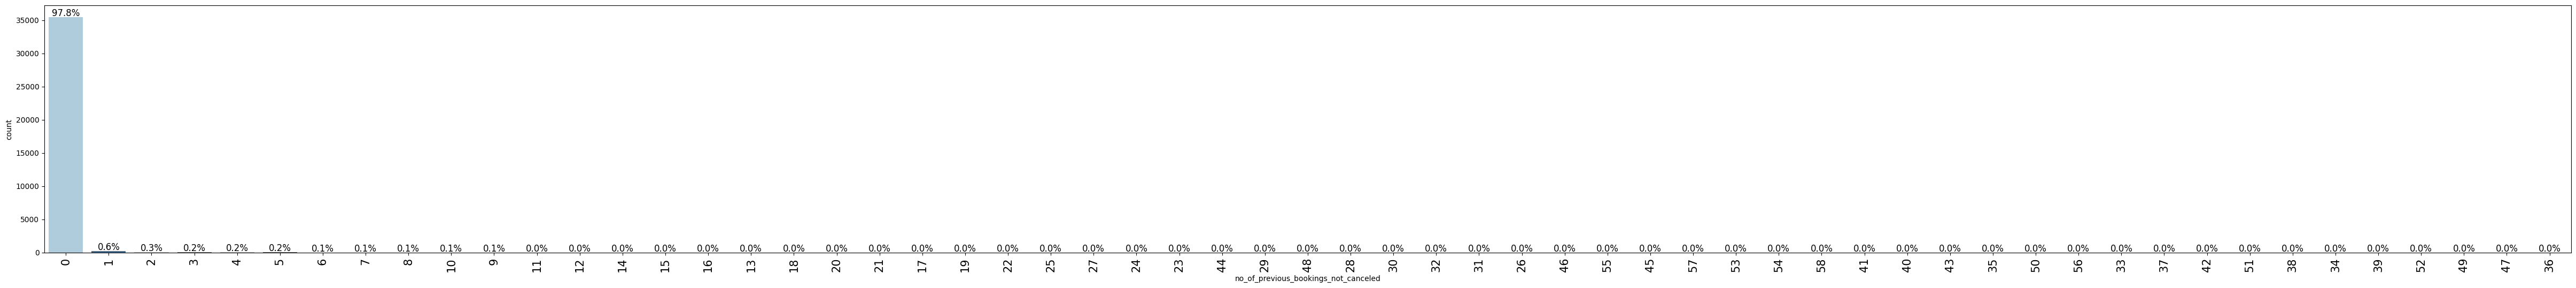

In [30]:
labeled_barplot(df1, "no_of_previous_bookings_not_canceled", perc=True)

There is 0.6% of no of previous booking that was not cancelled

## Observations:
97.8% have zero previous booking not cancelled and 99.1% nave no no previous cancellations and there are just only 2.1% repeat businesses.

Factor affecting repeat business should be analyzed

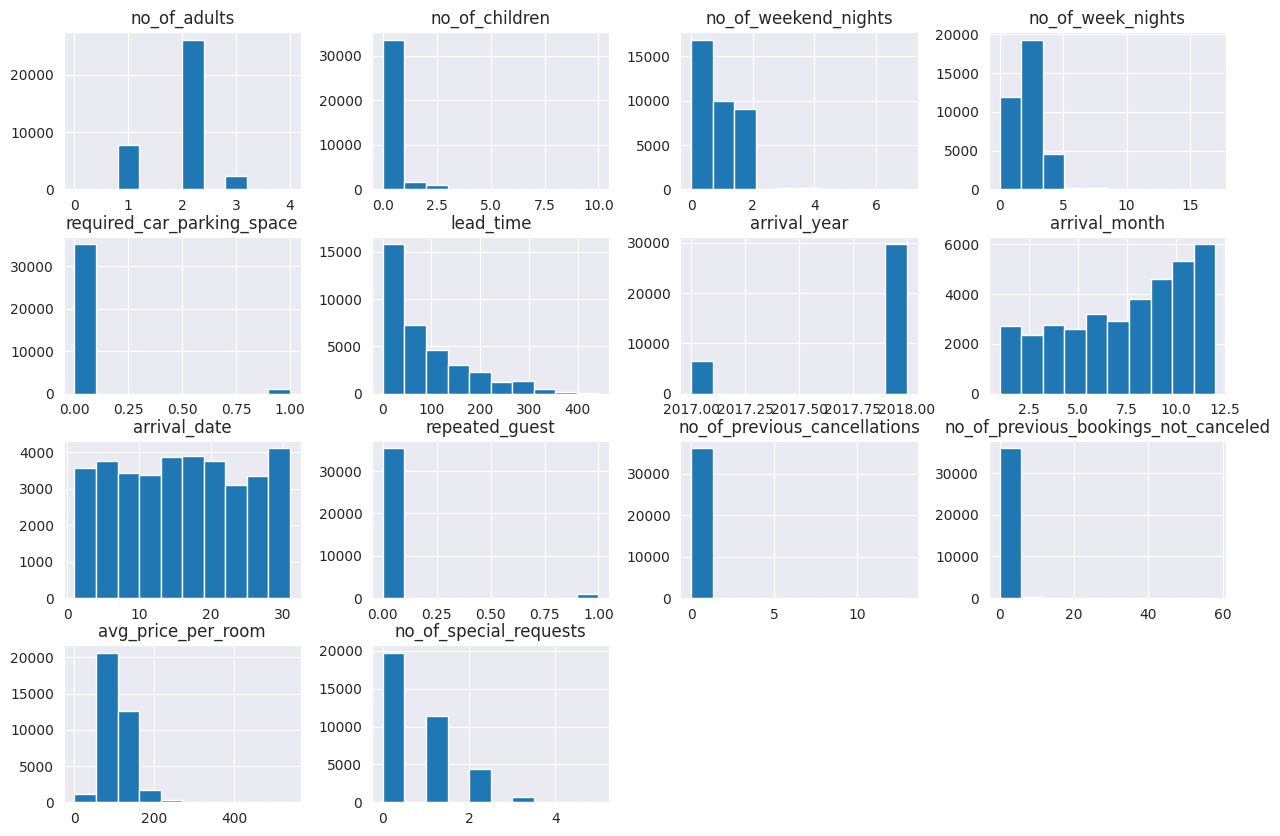

In [31]:
sns.set_style("darkgrid")
df.hist(figsize=(15,10))
plt.show()

### Bivarate Analysis

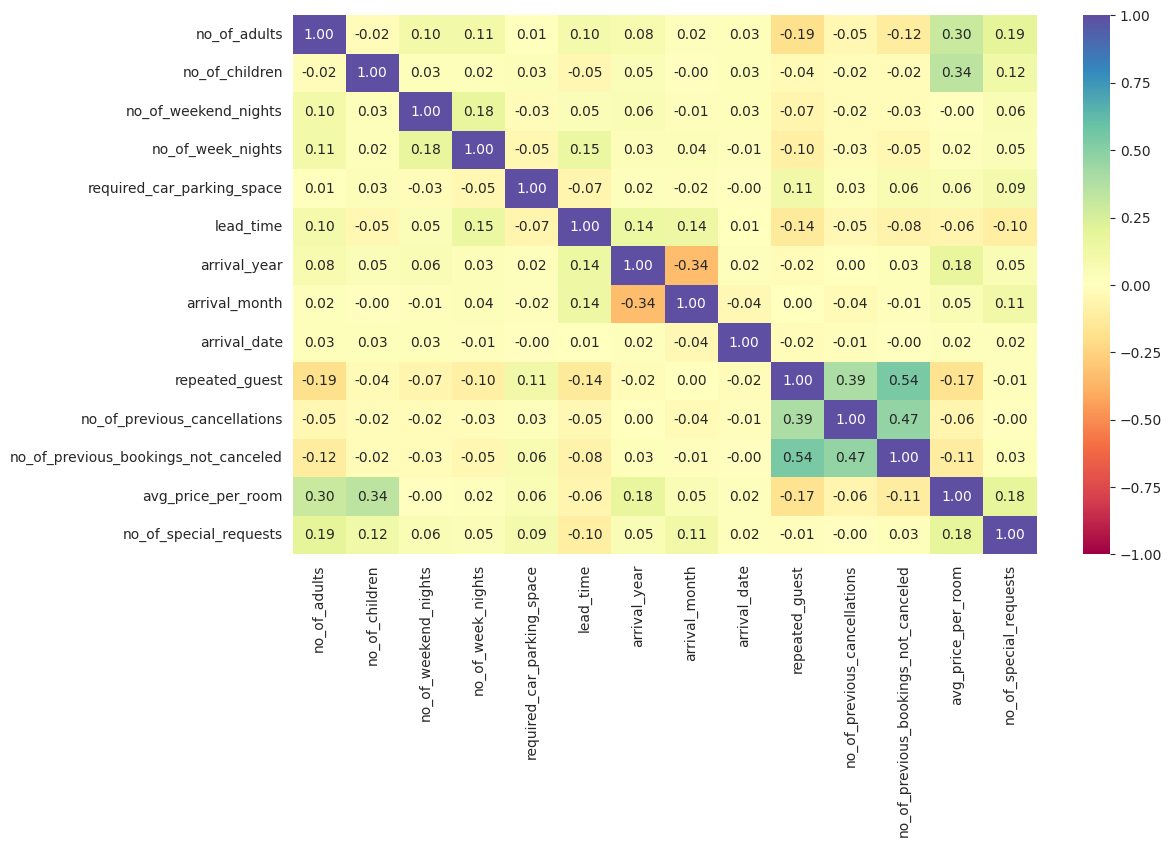

In [32]:
cols_list = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df1[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

 There is are few corellation amongst the variables

 However, no of children and no of adult have some form of positive corellation to the avg price per room

 Additionally, repeated guests, no of previous cancellation and avg price per room have high positive correllation

In [33]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = df1[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=df1[df1[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=df1[df1[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=df1, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=df1,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [34]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

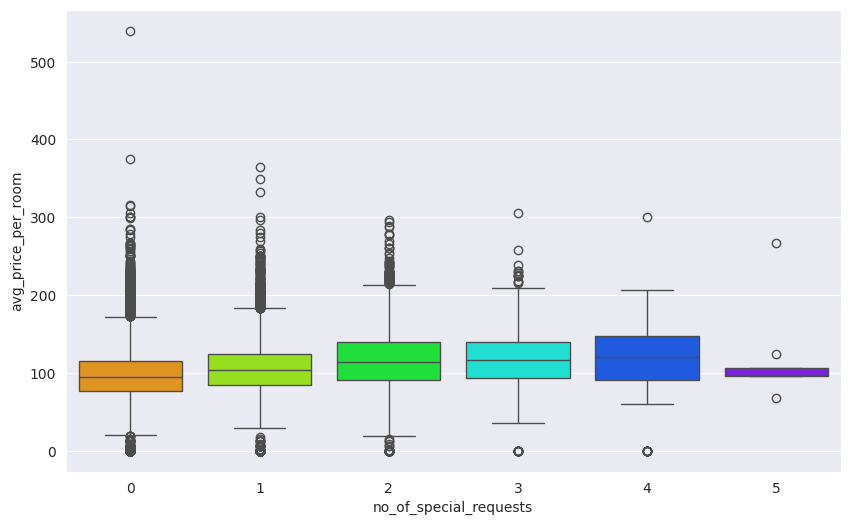

In [35]:
## Analysing the impact of average price per room with special request
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df1, x="no_of_special_requests", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

In [ ]:
df1[df1["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.00000,1,0
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.00000,1,0
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.00000,1,0
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.00000,1,0
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.00000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.00000,1,0
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.00000,1,0
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.00000,0,0
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.00000,2,0


In [ ]:
df1.loc[df1["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

Under complementary  market segment type, there are many outlier, so we will correct that outliers

##  Question 1: What are the busiest months in the hotel?

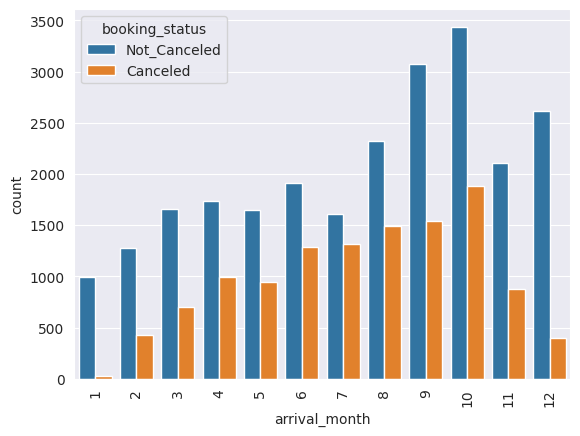

In [36]:
#showing plot for arrival months, and booking status
sns.countplot(x='arrival_month',hue= 'booking_status',data=df)
plt.xticks(rotation=90);
plt.show ()

Top 3 busiest months are October, September and December

January has the least count of booking and least canceled

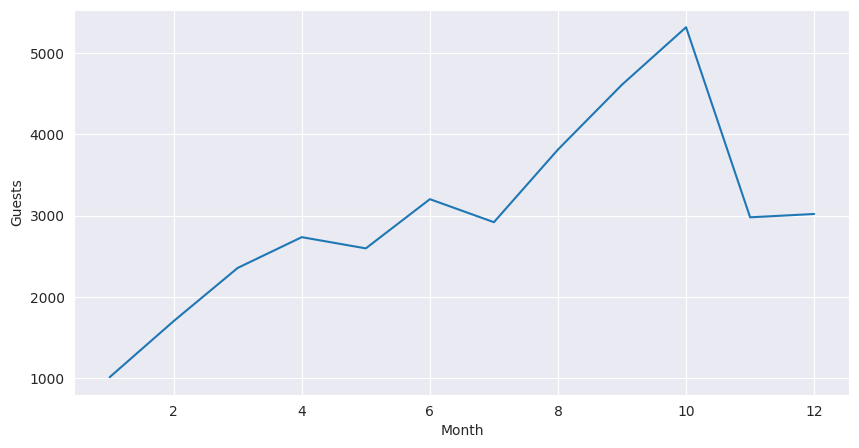

In [37]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = df.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

### October shows to be the busiest month

### Analysing how market segment type corellates with booking status

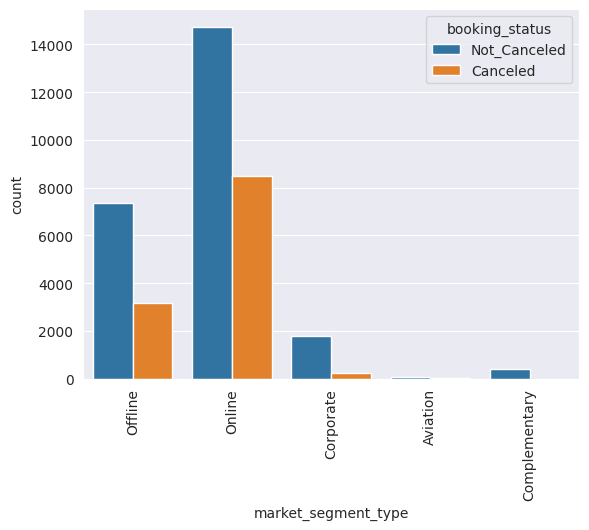

In [38]:
#showing plot for market segment type, and booking status
sns.countplot(x='market_segment_type',hue= 'booking_status',data=df)
plt.xticks(rotation=90);
plt.show ()

Online has the highest booking and also the highest cancelled

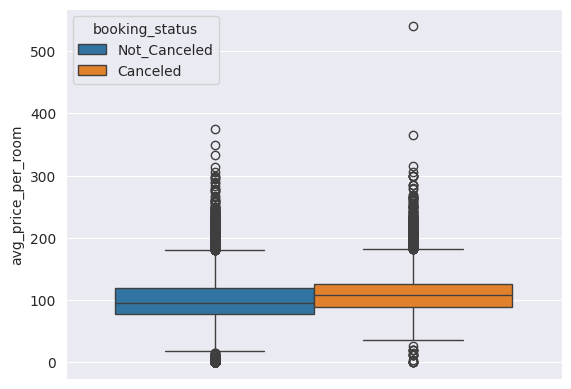

In [39]:
#showing plot for average price per room , and booking status
sns.boxplot(y='avg_price_per_room',hue= 'booking_status',data=df)
plt.xticks(rotation=90);
plt.show ()

The mean of the not-cancelled booking is below 100 Euros and cancelled is above a little above 100 Euro. Could small fraction difference in price be a determining factor between a booking being cancelled or not

## Question 2. Which market segment do most of the guests come from?

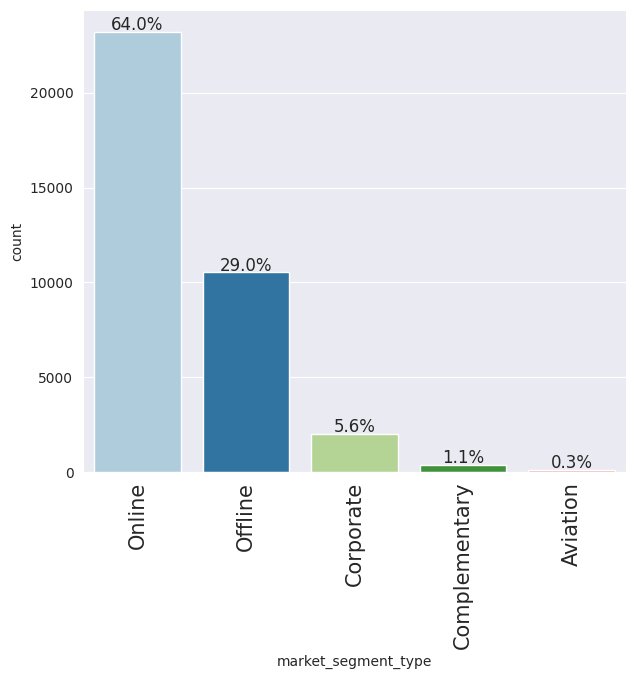

In [40]:
#analysing what market segment has the highest number of bookings/guest
labeled_barplot(df1, "market_segment_type", perc=True)

### Observation:


*   The online market segment type brings in the highest number of customers at 64%
*   This is followed by 29% offline market segment (probably walk-ins) and a paltry 5.6% corporate, 1.1% complementary and 0.3% aviation market segments



## Question 3: Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

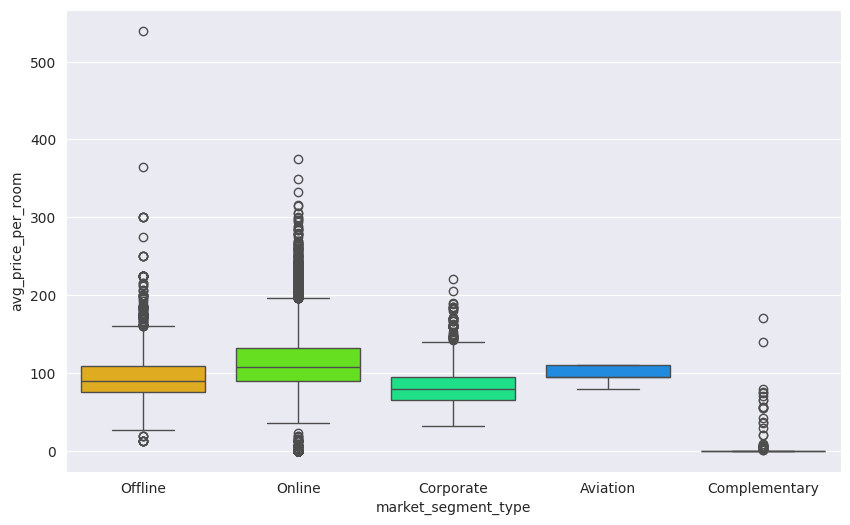

In [41]:
## Analysing the impact of average price per room with changes across market segment
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df1, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

## Observation:


*   Online segment seems to have higher prices with 25% percetile sitting close to 100Euro and 50% percentile at above 100 Euro and there are outliers on oth sides of the spectrum


*   Complementary has a lot of outliers





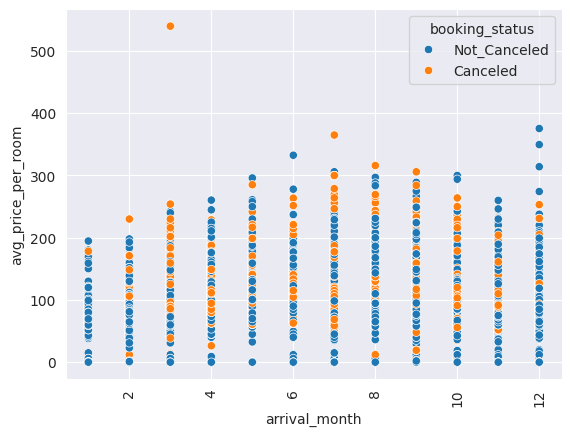

In [42]:
#showing plot for
sns.scatterplot(x="arrival_month", y="avg_price_per_room", hue= "booking_status",data=df)
plt.xticks(rotation=90);
plt.show ()

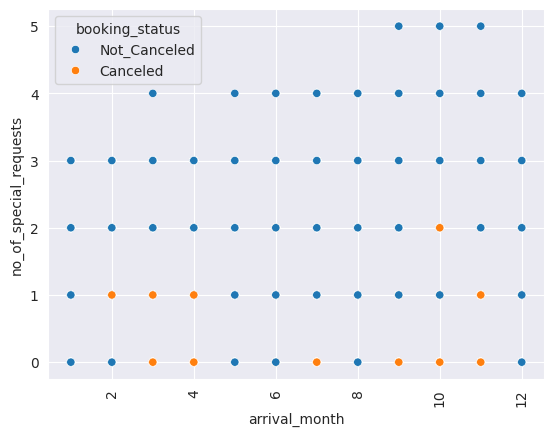

In [43]:
#showing plot for
sns.scatterplot(x="arrival_month", y="no_of_special_requests", hue= "booking_status",data=df)
plt.xticks(rotation=90);
plt.show ()

## Observation:

Average price per room seems highest in December with fewer cancellation. Data showed high prices of almost 400 Euro in December.


*   Some months seem to favour special request more than other, however, January, May, August and December seems to have no cancellation on special request





## Question 4: What percentage of bookings are canceled?

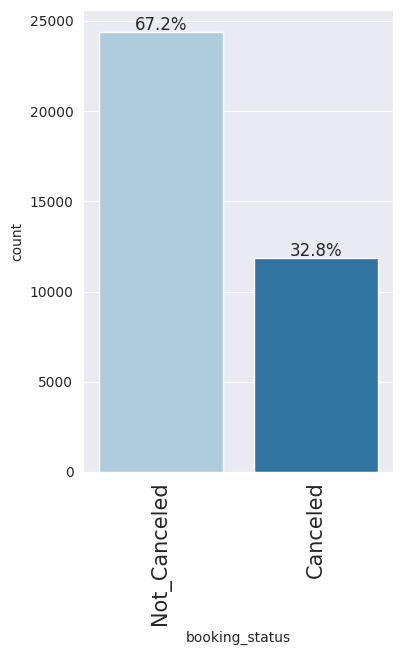

In [44]:
labeled_barplot(df, "booking_status", perc=True)

## Observations:


*   32.8% of bookings are cancelled



booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


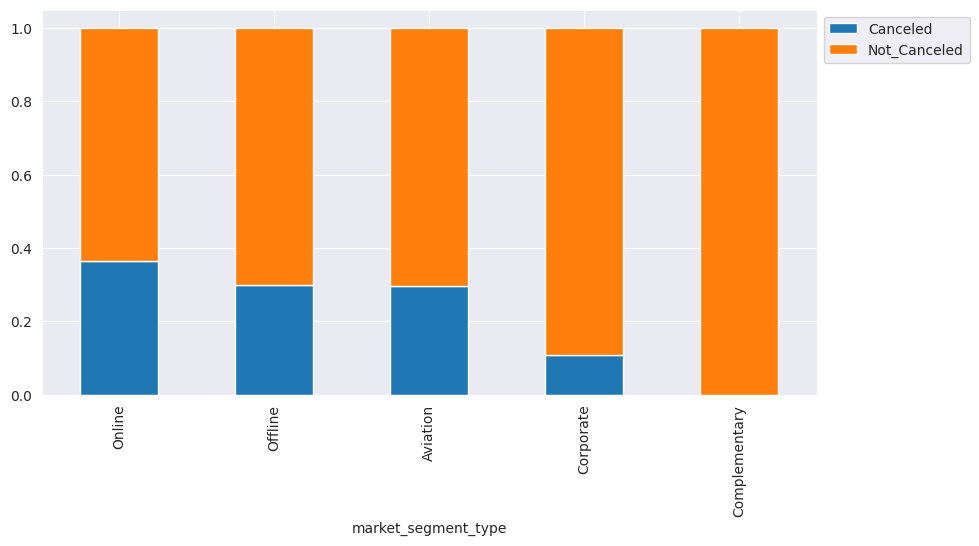

In [45]:
#Let's see how booking status varies across different market segments. Also, how average price per room impacts booking status
#showing plot for market segment type, and booking status
stacked_barplot(df, "market_segment_type", "booking_status")

## Observations:


*   The online market segment has the highest number number of cancellation in relations to its total number at almost 37% cancellation rate followed by Offline and Aviation at 30% cancellation rate



### Many guests have special requirements when booking a hotel room. Let's see how it impacts cancellations


booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


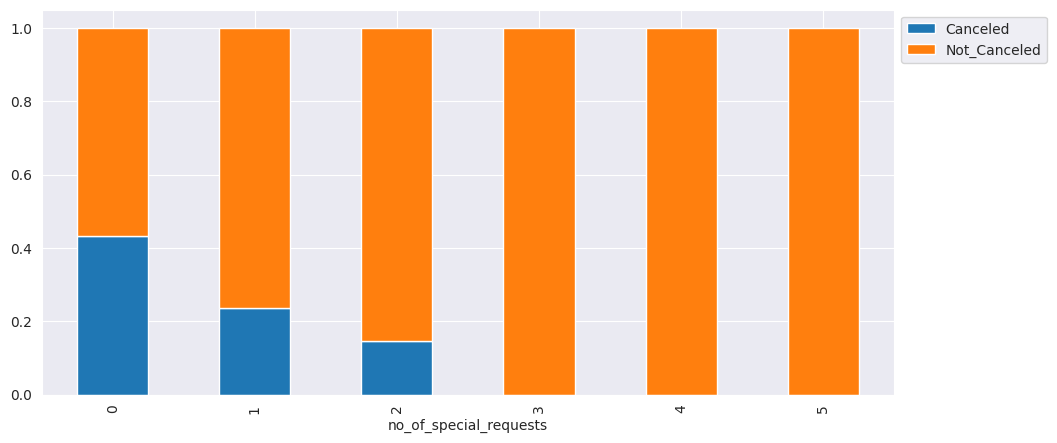

In [46]:
# checking how special request impacts cancellation
stacked_barplot(df, "no_of_special_requests", "booking_status")

###Observation:


*   Bookings with at least 3 special requests had zero cancellation
*   Bookings with no special request had 33% cancellations



### Need to see if special request impacted the cost of the average cost of room

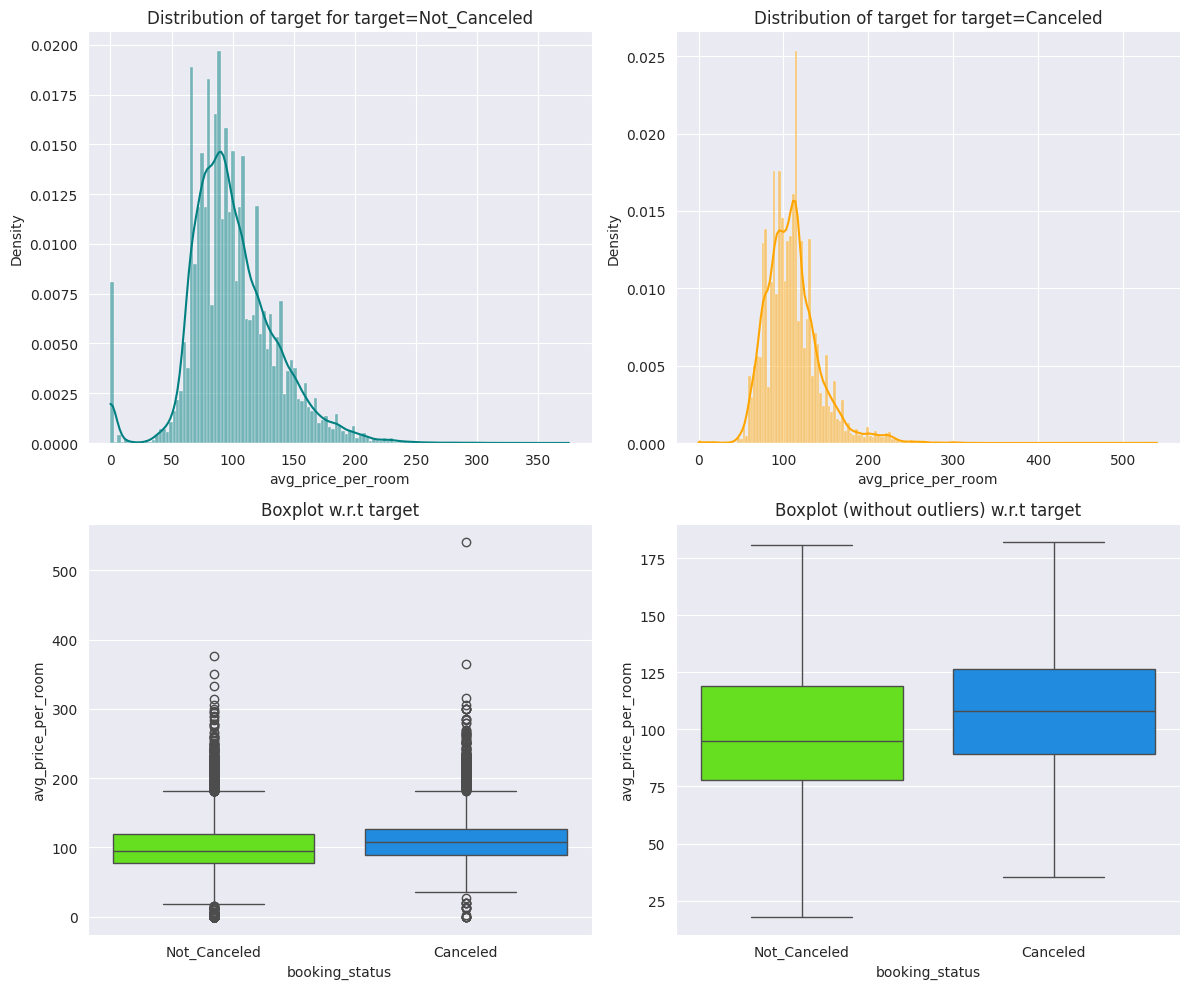

In [47]:
#analysing
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

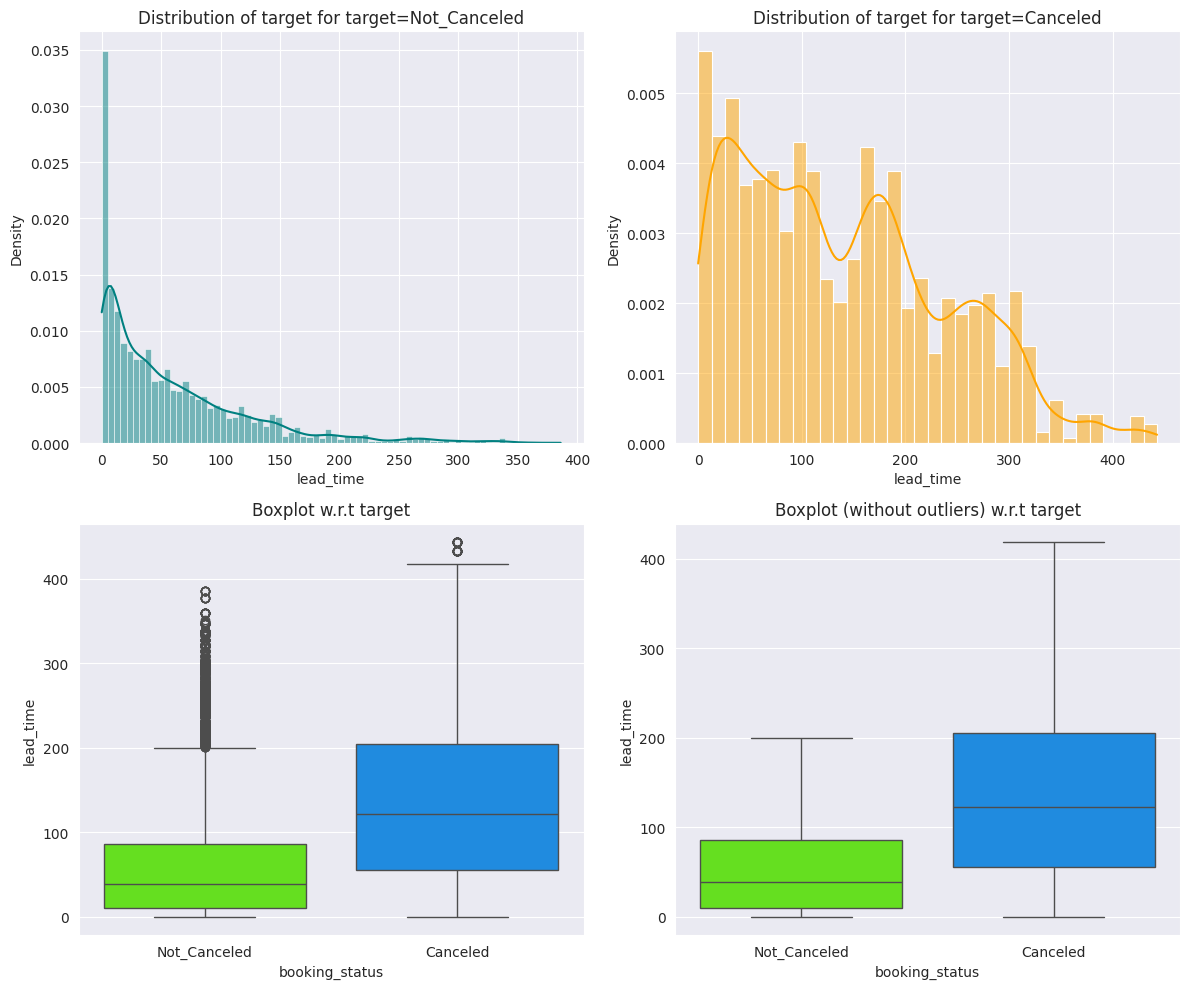

In [48]:
distribution_plot_wrt_target(df, "lead_time", "booking_status")

Creating new data frame

In [49]:
#Making a copy first
df2 = df.copy()

In [50]:
# encoding the cancelled and not cancelled class
df2["booking_status"] = df2["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

In [51]:
df2["booking_status"].value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

1 is the positive class and its is the cancelled class in the booking_status
column

0 is the negative class = not canceled

## Question 5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

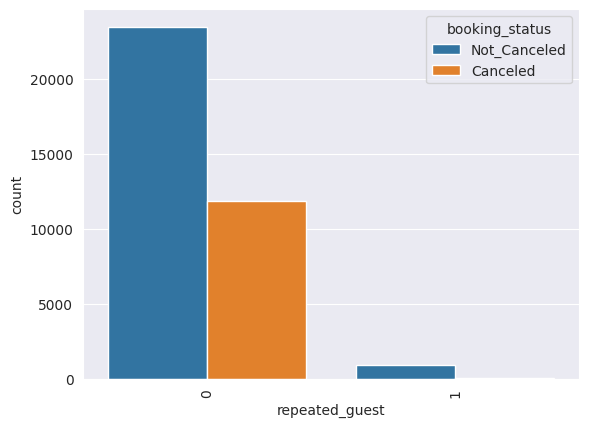

In [52]:
#showing plot for repeated guest, and booking status
sns.countplot(x='repeated_guest',hue= 'booking_status',data=df)
plt.xticks(rotation=90);
plt.show ()

Although there are very few repeated guest, the small repeated guests did not seem to have any cancellation

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

## Feature Engineering

In [55]:
#Feature Engineering - Drop the Booking_ID column

df2.drop('Booking_ID', axis =1,inplace=True)

###Outlier Detection and Treatment

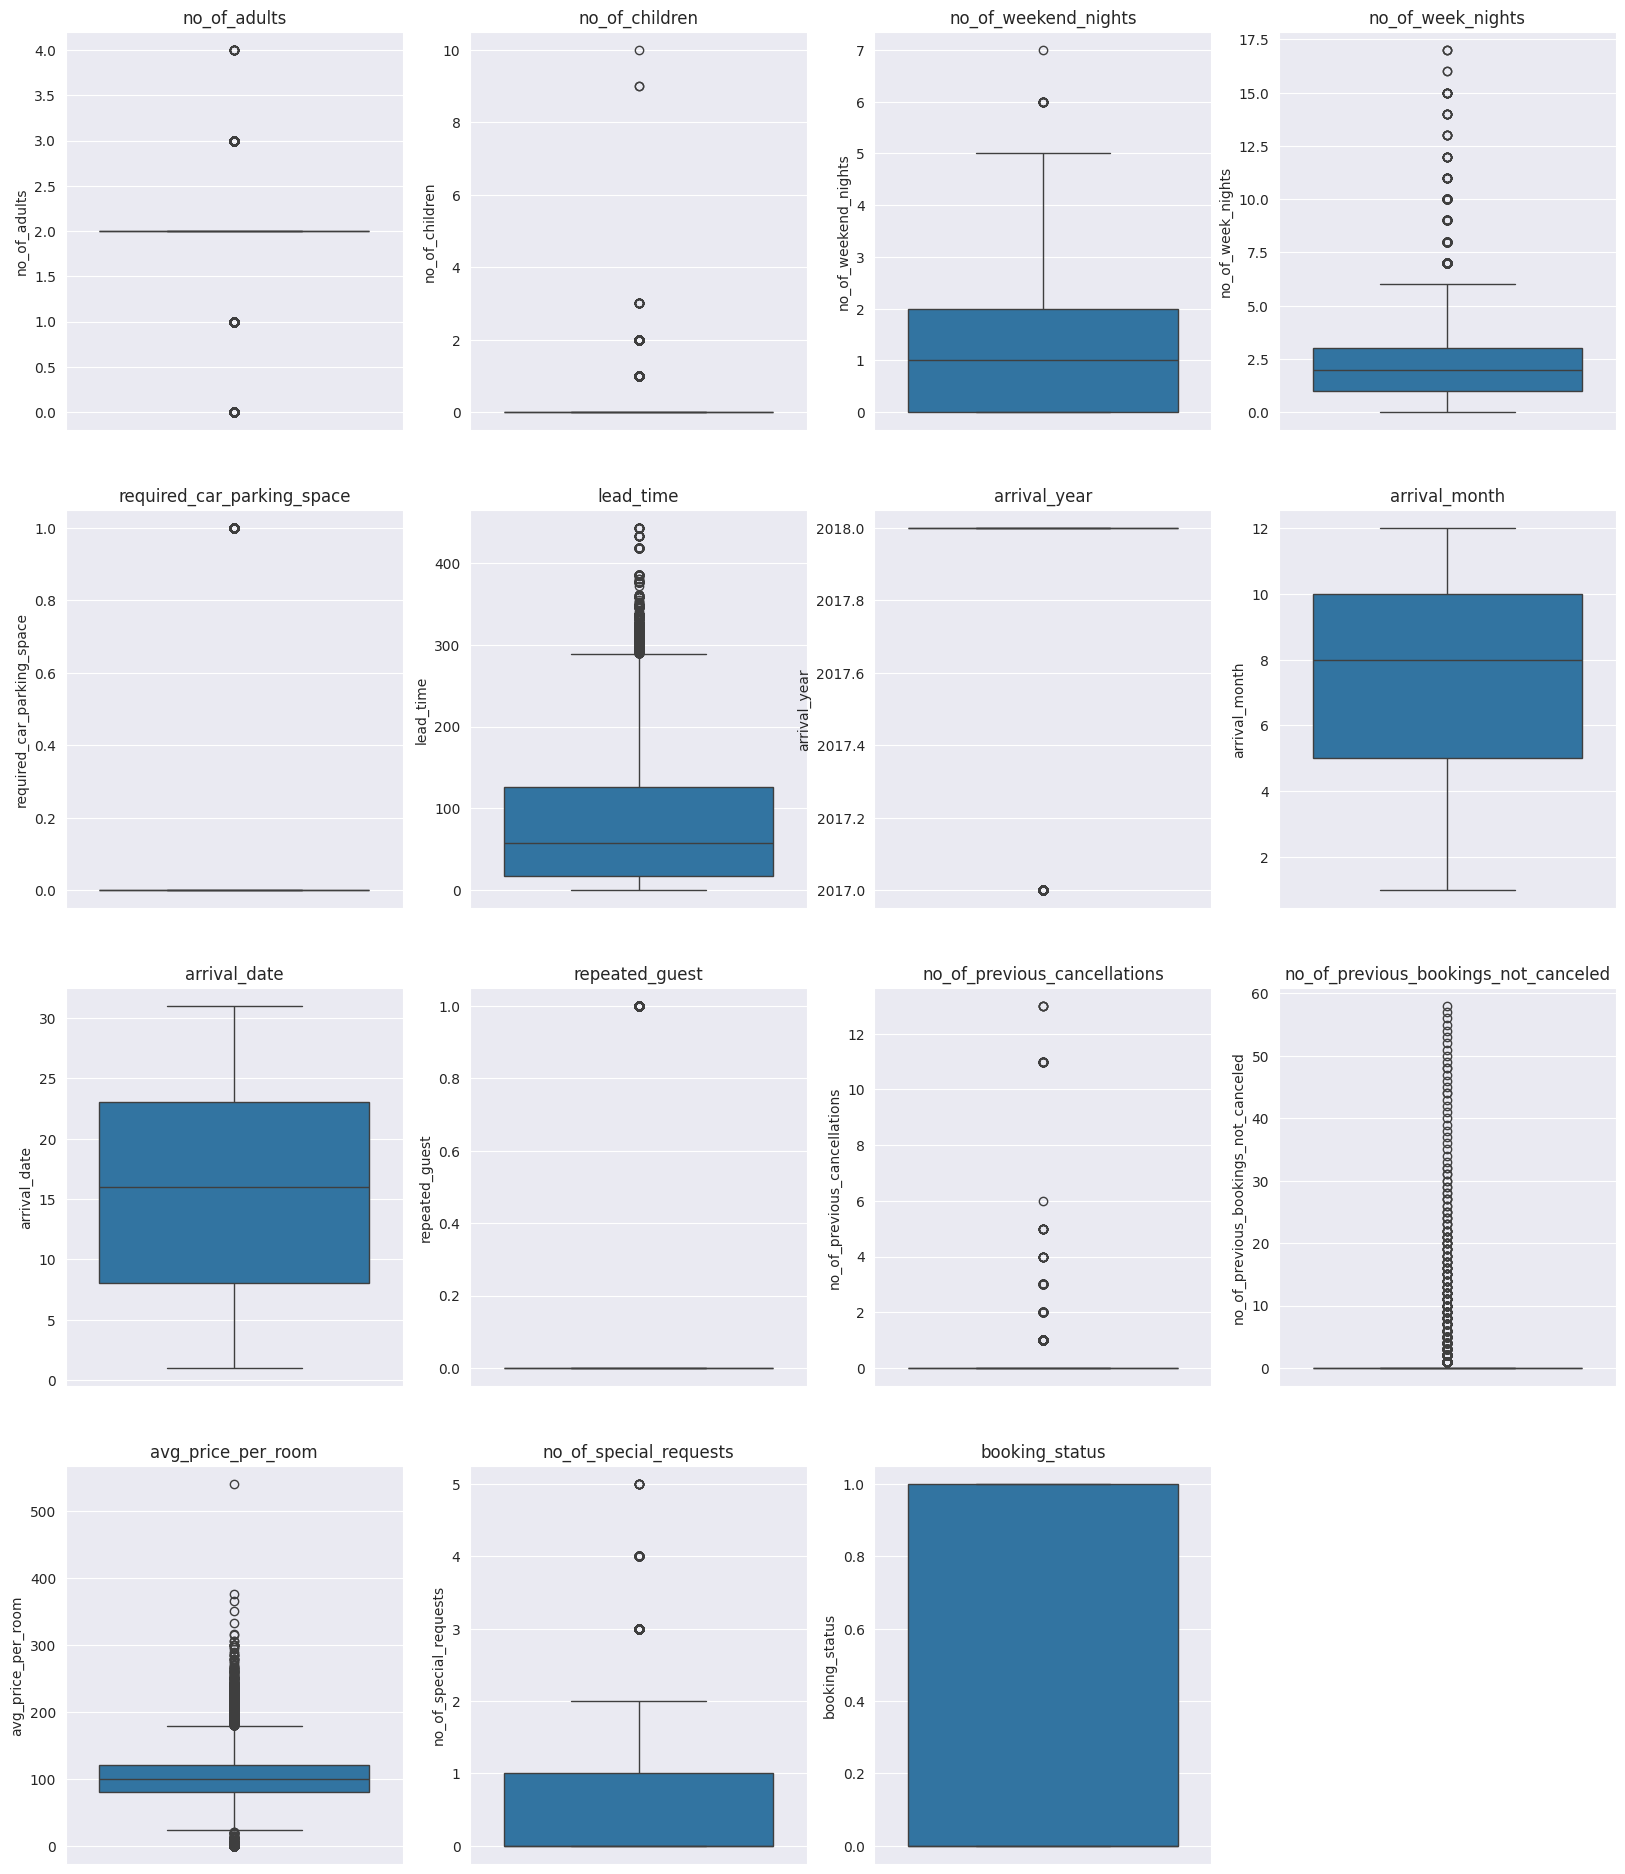

In [53]:
# outlier detection using the boxplot
num_cols = df2.select_dtypes (include = np.number).columns.tolist()

plt.figure (figsize = (20, 30))

for i, variable in enumerate (num_cols):
  plt.subplot (5, 4, i +1)
  sns.boxplot(df2[variable],whis=1.5)
  plt.tight_layout
  plt.title(variable)

plt.show()

Lead time, no_of_week_night,average price per room etc have lots of outliers. These are real values and we will not treat as we plan to use tree-based model.

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [56]:
# Getting the statistical summary of the dataset
df2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,NaN,NaN,NaN,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,NaN,NaN,NaN,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,NaN,NaN,NaN,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,NaN,NaN,NaN,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.00000,NaN,NaN,NaN,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.00000,NaN,NaN,NaN,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,NaN,NaN,NaN,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,NaN,NaN,NaN,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000


## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

## Building a Logistic Regression model

Model evaluation criterion

Model can make wrong predictions as:

Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking (False Positive - FN)
Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. (False Negative -FP)


Both the cases are important as:

If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.

How to reduce the losses?
Hotel would want F1 Score to be maximized,
greater the F1 score higher are the chances of minimizing False Negatives and False Positives as both classes are important.

F1 score is a balanced harmonic metric for Recall and Precision

## Steps To Follow:
1. Create functions to calculate different metrics and confusion
matrix so that the same code wont be used repeatedly for each model.
2. The model_performance_classification_statsmodels function will be used to check the model performance of models.
3. The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [57]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [58]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Logistic Regression (With stasmodels library)

## Model performance evaluation

### Data Preparation For Modelling

In [59]:
# checking encoding for booking status
df2["booking_status"].value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

Not cancelled is 0 and Cancelled is 1

In [60]:
## Data Preparation for Modelling
# define dependent and independent variables
X = df2.drop(["booking_status"], axis=1)
y = df2["booking_status"]


In [61]:
# let's add the intercept to data
X = sm.add_constant(X)

In [62]:
#creating dummy variables
X = pd.get_dummies(X, drop_first=True)

In [63]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 25392
Number of rows in test data = 10883


In [64]:
print("Shape of Training set : ", x_train.shape)
print("Shape of Test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of Test set :  (10883, 28)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64




*   Around 67.6% of observations belongs to class 0 (Not_Cancelled)

    Around 32.9% of observation belongs to class 1 (Canceled)

    All is preserved in the train and test sets



### Building Logistic Regression Model

In [65]:
# fitting logistic regression model
logit = sm.Logit(y_train, x_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Thu, 22 Feb 2024   Pseudo R-squ.:                  0.3293
Time:                        20:23:00   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.5923    120.817     -7.653      0.000   -1161.390    -687.795
no_of_adults                             0.1135      

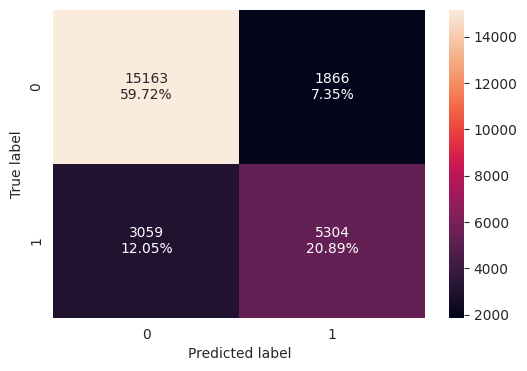

In [66]:
confusion_matrix_statsmodels(lg, x_train, y_train)

TP = Predicted Positive and actual is positive = 20.89%

FP = Predicted Positive but actual is negative =  7.35% (works for Precision)

TN = Predicted Negative and actual is negative = 59.72%

FN = Predicted Negative and actual is positive = 12.05% (works for Recall)


In [68]:
print("Training performance:")
model_performance_classification_statsmodels(lg, x_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80604,0.63422,0.73975,0.68293


Recall and Precision values are close at 0.63 and 0.73 respectively

F1 values stands at 0.68

## Checking For Collinearity

In [69]:
#Analysing
vif_series = pd.Series(
    [variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])],
    index=x_train.columns,
    dtype=float
)

In [71]:
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                  39468156.70600
no_of_adults                                  1.34815
no_of_children                                1.97823
no_of_weekend_nights                          1.06948
no_of_week_nights                             1.09567
required_car_parking_space                    1.03993
lead_time                                     1.39491
arrival_year                                  1.43083
arrival_month                                 1.27567
arrival_date                                  1.00674
repeated_guest                                1.78352
no_of_previous_cancellations                  1.39569
no_of_previous_bookings_not_canceled          1.65199
avg_price_per_room                            2.05042
no_of_special_requests                        1.24728
type_of_meal_plan_Meal Plan 2                 1.27185
type_of_meal_plan_Meal Plan 3                 1.02522
type_of_meal_plan_Not Selected                1

In [72]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [74]:
checking_vif(x_train)

,feature,VIF
0,const,39468156.70600
1,no_of_adults,1.34815
2,no_of_children,1.97823
3,no_of_weekend_nights,1.06948
4,no_of_week_nights,1.09567
5,required_car_parking_space,1.03993
6,lead_time,1.39491
7,arrival_year,1.43083
8,arrival_month,1.27567
9,arrival_date,1.00674


## Dropping high p-value variables
We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.

But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.

Instead, we will do the following:
Build a model, check the p-values of the variables, and drop the column with the highest p-value.

Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.

Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.



In [75]:
# initial list of columns
cols = x_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [76]:
x_train1 = x_train[selected_features]
x_test1 = x_test[selected_features]

In [77]:
 #fitting logistic regression model
logit1 = sm.Logit(y_train, x_train1.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Thu, 22 Feb 2024   Pseudo R-squ.:                  0.3283
Time:                        22:20:13   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -917.2860    120.456     -7.615      0.000   -1153.376    -681.196
no_of_adults                       0.1086      0.037      2.914      0.

Now there is no categorical feature with p-value greater than 0.05 so we can consider this as the final model

In [78]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, x_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80541,0.63255,0.73903,0.68166


####  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [79]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=x_train1.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.11475,1.16436,1.11475,1.04264,0.20305,1.01584,1.57324,0.95853,0.06480,1.25716,1.01935,0.22994,1.17992,1.33089,0.70046,0.75383,0.47940,0.38099,0.23903,0.45258,0.16750
Change_odd%,-100.00000,11.47536,16.43601,11.47526,4.26363,-79.69523,1.58352,57.32351,-4.14725,-93.52026,25.71567,1.93479,-77.00595,17.99156,33.08924,-29.95389,-24.61701,-52.05967,-61.90093,-76.09669,-54.74162,-83.24963


### Coefficient Interpretations


*   no_of_adults: Holding all other features constant a 1 unit change in no of adults will decrease the odds of a person cancelling a booking by 1.11 times or a 11.47% increase in odds of not canceling booking
*   no_of_children: Holding all other features constant  a unit change in no_of_children will decrease the odds of a person cancelling a booking by 1.16 times or an increase of 16.44% increase in odds of not cancelling a booking.



### Training Set Performance

In [ ]:
#creating confusion matrix
confusion_matrix_statsmodels(lg1,x_train1,y_train)

In [80]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1,x_train1,y_train
)

print ("Training Performance:")
log_reg_model_train_perf

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.80541,0.63255,0.73903,0.68166


## Test Set Performance


In [ ]:
#creating confusion matrix
confusion_matrix_statsmodels(lg1,x_test1,y_test)

In [81]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1,x_test1,y_test
)

print ("Test Performance:")
log_reg_model_test_perf

Test Performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641




*   The model is generalising well with a score of giving a f1 score of 0.68 on both train and test sets
*   As the train and test set performances are the almost the same, the model is not underfitting or overfitting


*   However, we will seek to improve the performance of the model





## Model Performance Improvement

*   We would like to see if the f1_score can be improved further by changing the model threshold

*   We will check the ROC curve, compute the area under the ROC curve (ROC-AUC) and then use it to find the optimal threshold.
*   Next, we will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is f1_score






## ROC Curve and ROC-AUC

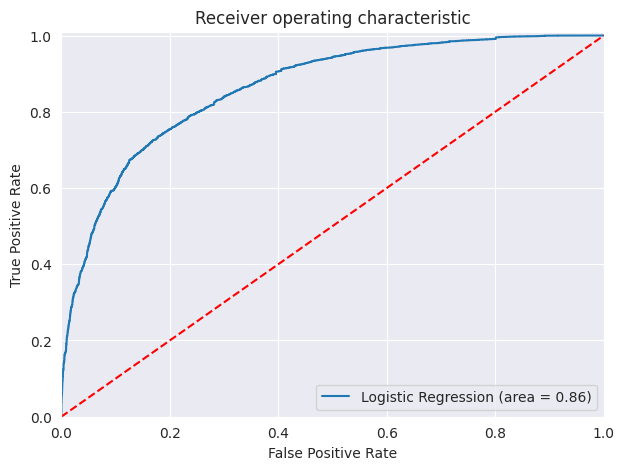

In [83]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(x_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(x_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Logistic Regression model is giving a good performance on training set

We need to find an optimal threshold using the AUC-ROC curve

In [84]:
#optimal threshold as per AUC - ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr,tpr, thresholds = roc_curve(y_train,lg1.predict(x_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.37104666234890077


### Checking model performance on training set using the optimal threshold -0.37

In [ ]:
#creating confusion matrix
confusion_matrix_statsmodels(lg1,x_train1,y_train,threshold=optimal_threshold_auc_roc)

In [85]:
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1,x_train1,y_train,threshold=optimal_threshold_auc_roc
)

print ("Training Performance:")
log_reg_model_train_perf_threshold_auc_roc

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.79289,0.73562,0.66870,0.70056


The Recall and F1_score has increased however Precision reduced

The model is giving better performance



### Checking the model performance on the test set

First get the ROC_AUC score

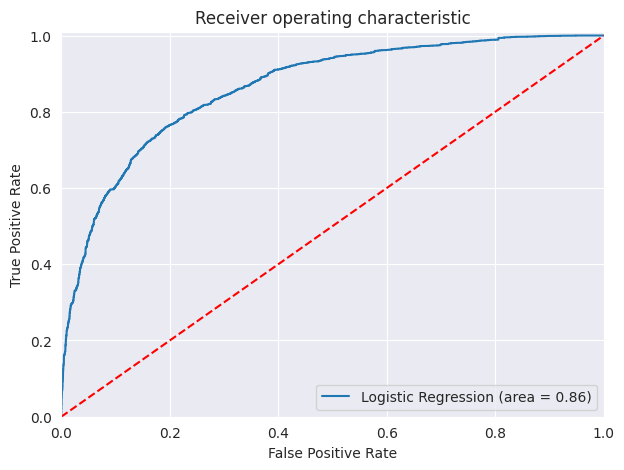

In [88]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(x_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(x_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
#optimal threshold as per AUC - ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr,tpr, thresholds = roc_curve(y_test,lg1.predict(x_test1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

### Checking model performance on test set using optimal threshold -0.37

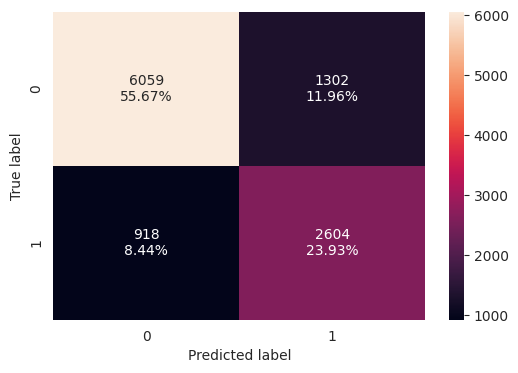

In [96]:
#creating confusion matrix
confusion_matrix_statsmodels(lg1,x_test1,y_test,threshold=optimal_threshold_auc_roc)

In [89]:
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1,x_test1,y_test,threshold=optimal_threshold_auc_roc
)

print ("Test Performance:")
log_reg_model_test_perf_threshold_auc_roc

Test Performance:


,Accuracy,Recall,Precision,F1
0,0.79601,0.73935,0.66667,0.70113


The model is performing well on both the test and training sets

### Precision-Recall Curve

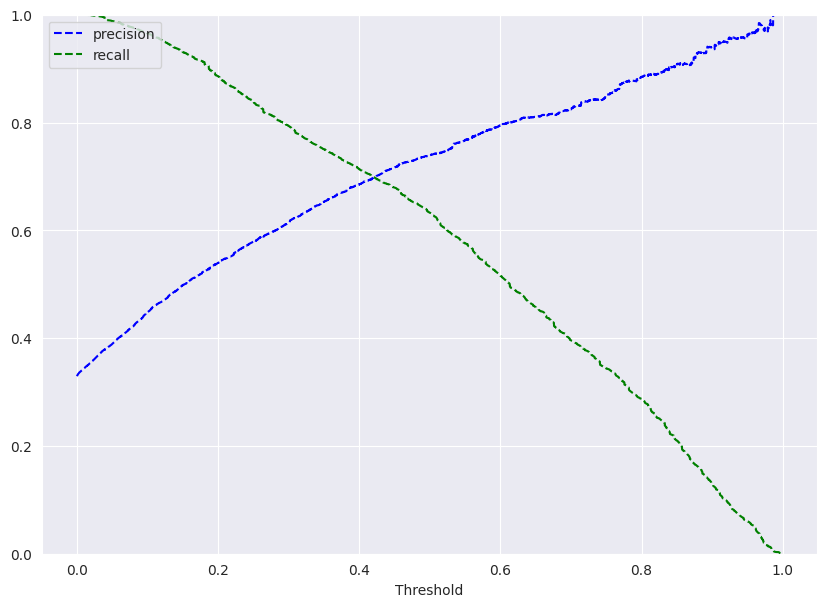

In [90]:
y_scores = lg1.predict(x_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [92]:
# To find a perfect match between precision and recall, create a datafram with precision recall and threshold
pre_recall_thres = pd.DataFrame({'Threshold' : tre,
                                 'Precision' : prec[: -1],
                                 'Recall' : rec[: -1]})

match_index = np.argwhere(prec[:-1] == rec[:-1]) #argwhere would find where there is a perfect match

match_index

array([[13164]])

In [93]:
#match_index
pre_recall_thres.loc[13164]

Threshold   0.42096
Precision   0.69891
Recall      0.69891
Name: 13164, dtype: float64

Where Precision and Recall are the same value, Threshold is 0.42

## Checking Model Performance on Training Set for Threshold of 0.42

In [95]:
# setting the threshold
# optimal_threshold_curve = 0.42

optimal_threshold_curve = 0.42096

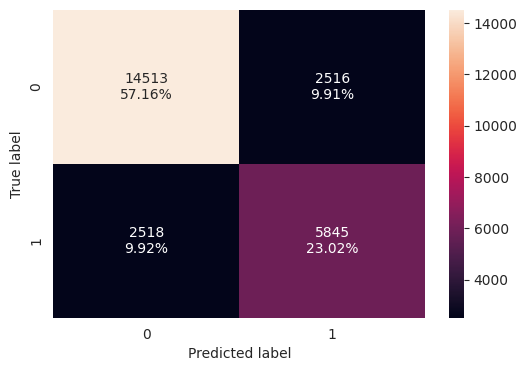

In [97]:
#creating confusion matrix
confusion_matrix_statsmodels(lg1,x_train1,y_train,threshold=optimal_threshold_curve)

In [99]:
log_reg_model_train_perf_threshold_curve= model_performance_classification_statsmodels(
    lg1,x_train1,y_train,threshold=optimal_threshold_curve
)

print ("Training Performance:")
log_reg_model_train_perf_threshold_curve

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.80175,0.69891,0.69908,0.69900


Checking Model Performance on Test Set for Threshold of 0.42

In [ ]:
#creating confusion matrix
confusion_matrix_statsmodels(lg1,x_test1,y_test,threshold=optimal_threshold_curve)

In [100]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1,x_test1,y_test,threshold=optimal_threshold_curve
)

print ("Test Performance:")
log_reg_model_test_perf_threshold_curve

Test Performance:


,Accuracy,Recall,Precision,F1
0,0.80410,0.70301,0.69512,0.69904


###Model performed more balanced on both training and test sets

##Model Performance Comparison and Final Model Summary

In [102]:
# training perfomance comparison
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80541,0.80175,0.80175
Recall,0.63255,0.69891,0.69891
Precision,0.73903,0.69908,0.69908
F1,0.68166,0.69900,0.69900


In [104]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80465,0.79601,0.80410
Recall,0.63089,0.73935,0.70301
Precision,0.72900,0.66667,0.69512
F1,0.67641,0.70113,0.69904




*   Almost all the three models are performing well on both training and test data without the problem of overfitting
*   The model with the threshold of 0.37 is giving the best F1 score. (0.70113). therefore, it can be selected as the final model



## Building a Decision Tree model

### Data Preparation for Decision Tree Modelling

We want to predict which bookings will be canceled.
The problem is False Positive (Recall) if a booking is predicted good but it turns out bad, then the hotel will lose lots of money and not able to recoup faster and to sell off cancelled rooms

Before we proceed to build a model, we'll have to encode categorical features.

We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [7]:
# first create a copy of the data
df4 = df.copy()

In [8]:
# encoding the cancelled and not cancelled class
df4["booking_status"] = df4["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

In [9]:
# checking encoding for booking status
df4["booking_status"].value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

In [10]:
X = df4.drop(["booking_status"], axis=1)
Y = df4["booking_status"]

In [11]:
#creating dummy variables
X = pd.get_dummies(X, drop_first=True)


In [12]:
# splitting the data in 70:30 ratio for train to test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])


Number of rows in train data = 25392
Number of rows in test data = 10883


In [13]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(Y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(Y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 36301)
Shape of Test set :  (10883, 36301)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


The percetages of classes for the in both training and test set are almost the same.

The shape of test and train is 0 for Canceled and 1 for Not Canceled

### Build the Model

In [14]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=1)

### Model Evaluation

###Create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

The model_performance_classification_sklearn function will be used to check the model performance of models.


The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

Canceled - (0) Positive Class
Not Cancelled - Negative Class

In [15]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [16]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

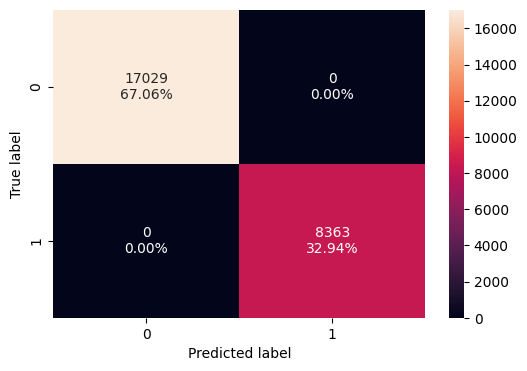

In [17]:
confusion_matrix_sklearn(model0, X_train,Y_train)

In [31]:
decision_tree_perf_train_without = model_performance_classification_sklearn(model0,X_train,Y_train)

In [50]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model0, X_train, Y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


On the first model: the model performance on the train set  is showing 1.0000for all parameters. This is too perfect.

## Check Performance on Test Set

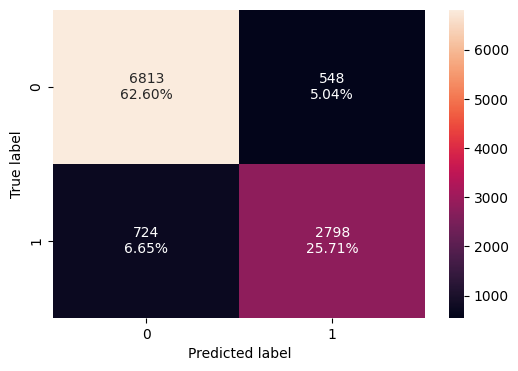

In [32]:
confusion_matrix_sklearn(model0, X_test,Y_test)

In [33]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, Y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.88312,0.79443,0.83622,0.81479


The model is overfitting because there is a substantial disparity between the test and training set

### Decision Tree (with class weight)

Class_weight can be use to balance class frequency

In [18]:
model = DecisionTreeClassifier(random_state=1,class_weight="balanced")
model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

In [35]:
#confusion_matrix_sklearn(model,X_train,Y_train)

In [44]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, Y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


In [38]:
#confusion_matrix_sklearn(model,X_test,Y_test)

In [47]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, Y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.87788,0.82794,0.80132,0.81441


There is still some disparity in the performance, not really much but maybe the model performance can be improved

## Do we need to prune the tree?
We want to make our F1 as high as possible, so we can prune
Before we prune , we need to understand the important features of the tree





Using Grid search turning

In [19]:
%%time

# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, Y_train)

CPU times: user 1h 18min 1s, sys: 11min 54s, total: 1h 29min 55s
Wall time: 1h 29min 34s


DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

###Checking performance on training set

In [20]:
#confusion_matrix_sklearn(estimator,X_train,Y_train)

In [21]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, Y_train )
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83101,0.78620,0.72428,0.75397


###Checking performance on test set

In [22]:
#confusion_matrix_sklearn(estimator,X_test,Y_test)

In [23]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, Y_test )
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83497,0.78336,0.72758,0.75444




*   The model is giving a generalized result now on both train and test sets and should be able to generalized well on unseen data.




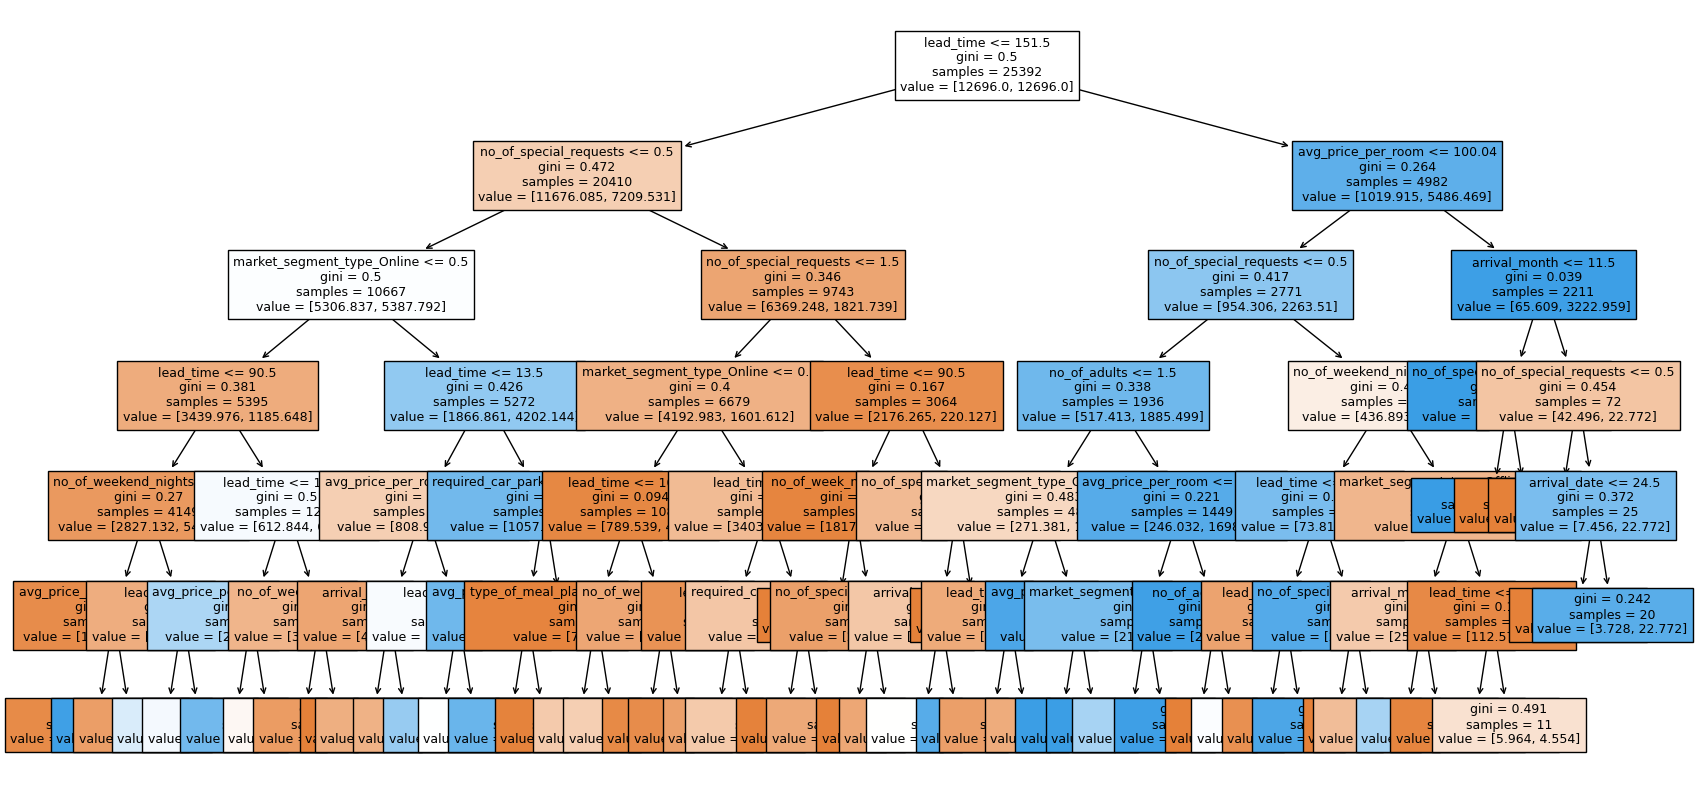

In [49]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [40]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 132.08] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 25.81] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

Observations:
When the lead time is less than or equal to 151.5 days, the number of special request is less than or equal to 0.5

The market type segment online is less than or equal to 0.5

Average price per room will be greated than 196.50 Euro

When all of this conditions are present , the booking will most likely be cancelled

##Cost Complexity Pruning

In [25]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [26]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,-0.00000
1,0.00000,-0.00000
2,0.00000,-0.00000
3,0.00000,-0.00000
4,0.00000,-0.00000
...,...,...
1134,0.00890,0.32806
1135,0.00980,0.33786
1136,0.01272,0.35058
1137,0.03412,0.41882


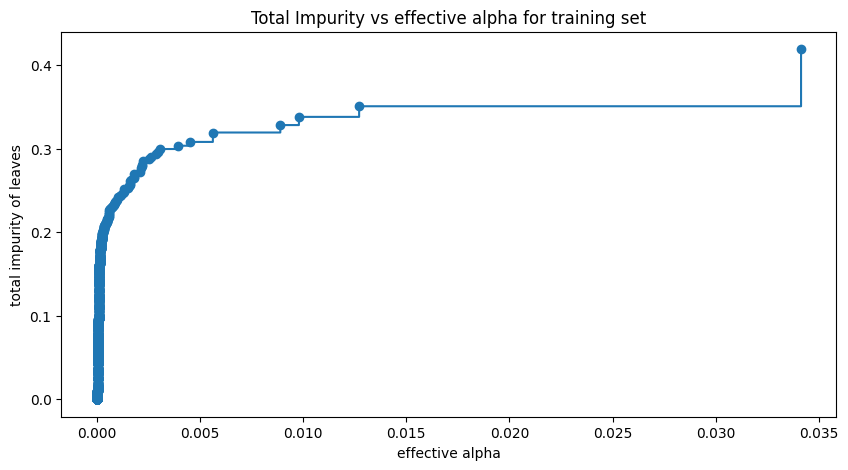

In [54]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas.
The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [27]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train,Y_train) ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136976


In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

###F1 Score vs alpha for training and testing sets

In [29]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(Y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(Y_test, pred_test)
    f1_test.append(values_test)

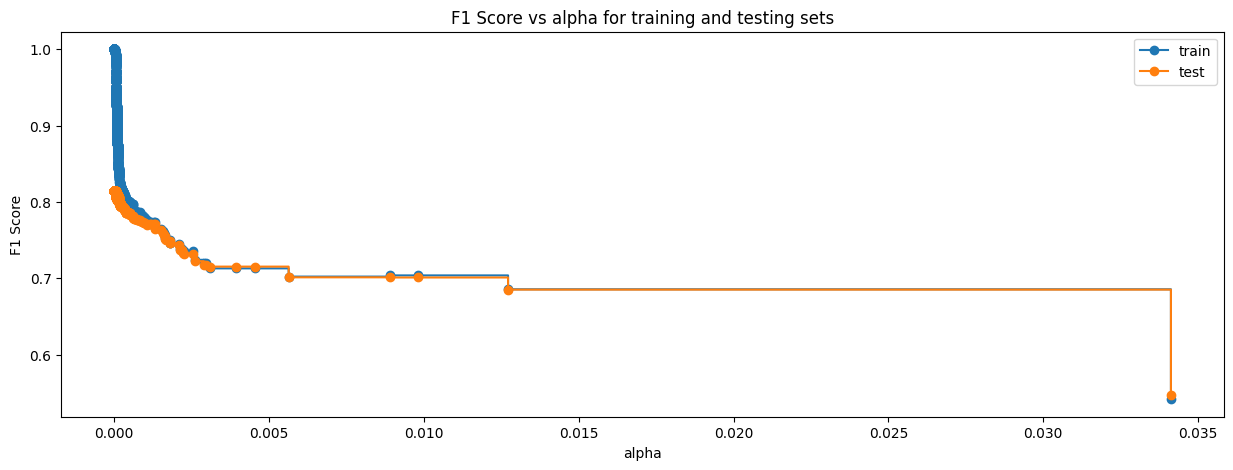

In [50]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [30]:
# creating the model where we get highest F1 score for the train and test set
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=3.938248267171154e-05, class_weight='balanced',
                       random_state=1)


### Checking Performance on Training Set

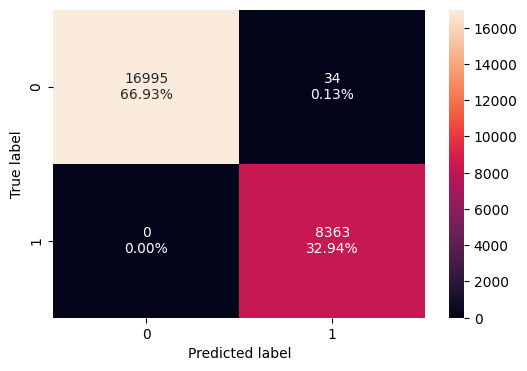

In [31]:
confusion_matrix_sklearn(best_model, X_train, Y_train)

In [32]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, Y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.99866,1.00000,0.99595,0.99797


###Checking Performance on Testing Set

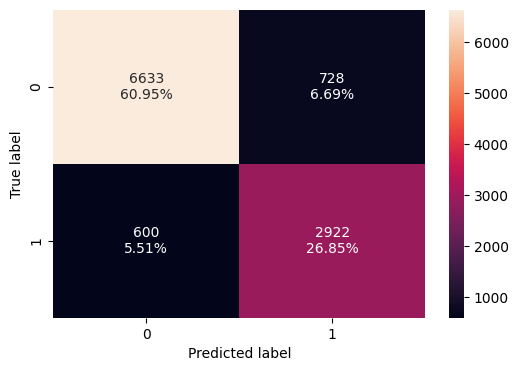

In [33]:
confusion_matrix_sklearn(best_model, X_test, Y_test)

In [34]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, Y_test
)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.87797,0.82964,0.80055,0.81484


### Visualizing the Decision Tree

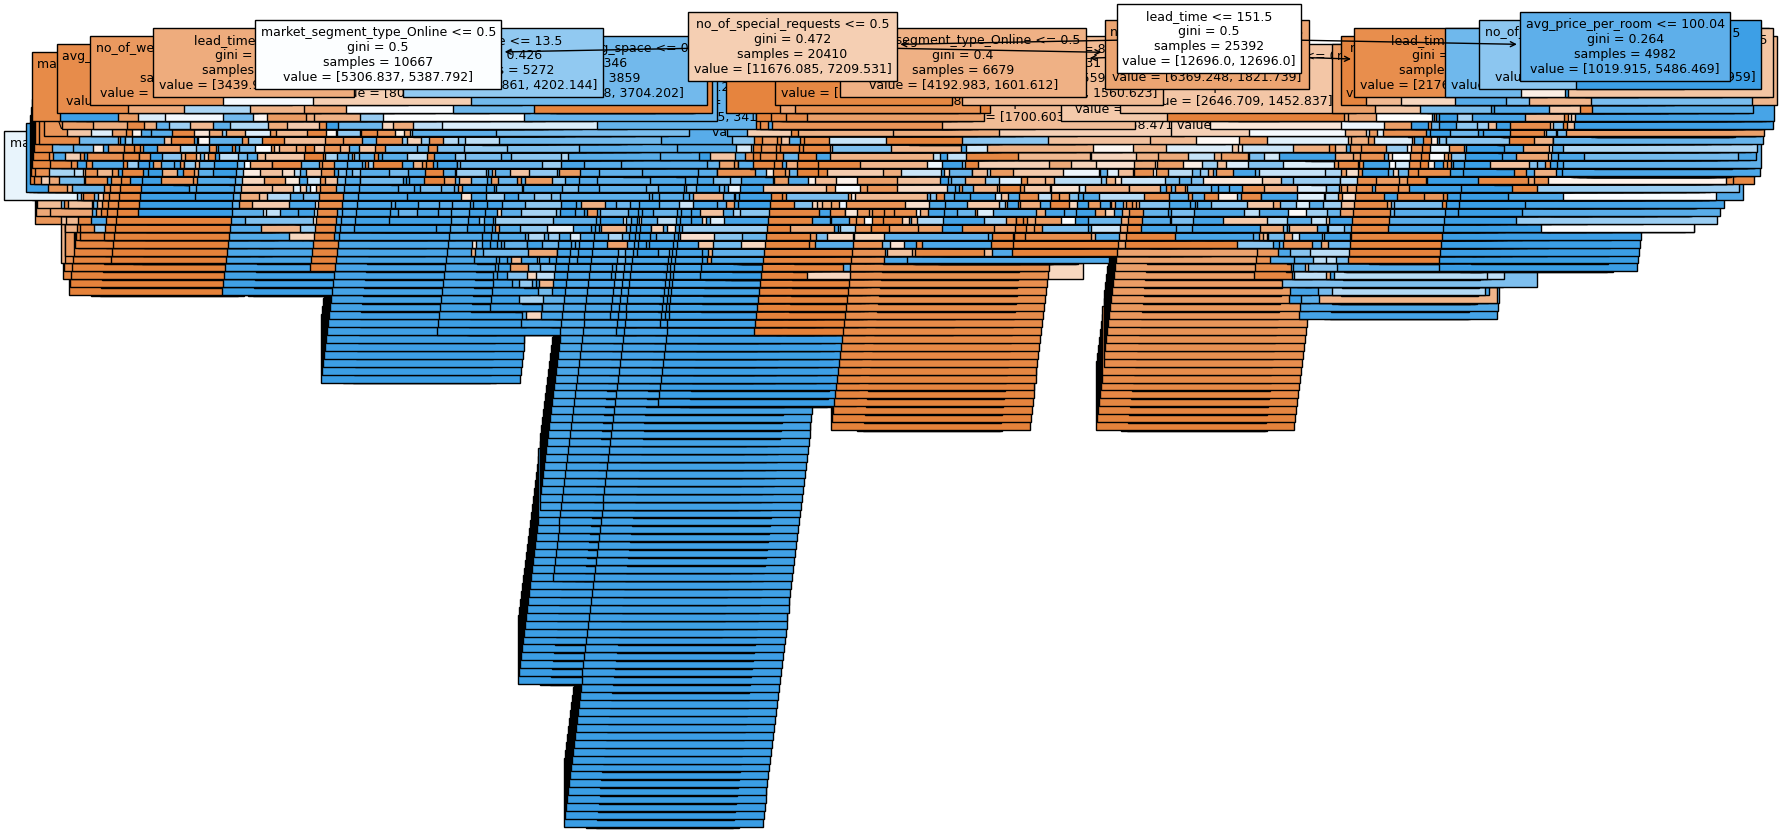

In [41]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [42]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- Booking_ID_INN34545 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Booking_ID_INN07157 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- Booking_ID_INN07157 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.52] class: 1
|   |   |   |   |   |   |   |   |   |--- Booking_ID_INN34545 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.52] class: 1
|   |   |   |   |   |   |   |   |--- avg_price_p

In [43]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False))

                               Imp
lead_time                  0.30646
avg_price_per_room         0.11433
market_segment_type_Online 0.09430
no_of_special_requests     0.08495
arrival_month              0.05172
...                            ...
Booking_ID_INN12257        0.00000
Booking_ID_INN12256        0.00000
Booking_ID_INN12255        0.00000
Booking_ID_INN12254        0.00000
Booking_ID_INN18138        0.00000

[36301 rows x 1 columns]


In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Conclusions

In [45]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.00000,0.83101,0.99866
Recall,1.00000,0.78620,1.00000
Precision,1.00000,0.72428,0.99595
F1,1.00000,0.75397,0.99797


In [48]:
# testing performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_train_comp_df

Testing performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87788,0.83497,0.87797
Recall,0.82794,0.78336,0.82964
Precision,0.80132,0.72758,0.80055
F1,0.81441,0.75444,0.81484


Both the pre-pruning and post-pruning decision trees gave high metrics.
*   However, the post-pruning model is better better and the model generalized well on both testing and training sets. So we will choose the post pruning model


## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

Observations:


*   Both the pre-pruning and post-pruning decision trees gave high F1 score
*   However, the post-pruning model will be better for prediction



###Insights

*   The developed model accurately predicts hotel booking cancellations, achieving a 32.8% accuracy rate. Key variables influencing cancellations include lead time, market segment (online), number of special requests, and average price per room.


*   According to the decision tree analysis, bookings are likely to be cancelled if the lead time is 151.5 days or less, the number of special requests is 0.5 or fewer, the market segment type is online with a value of 0.5 or less, and the average price per room exceeds 196.5 euros.

*   INN Hotel should pay attention to these factors to anticipate potential cancellations. Additionally, gathering more data, particularly regarding booking patterns during the busy months (including October -the busiest), can provide valuable insights into the reasons behind increased cancellations during this period.




### Recomendations


*  Since Lead time, online market segment type, number of special requests, and average room price are the most important feature in forecasting booking cancellations, more analysis can be performed into drill down into improvement factors.


*   Analysis reveals that bookings are likely to be cancelled if lead time is ≤ 151.5 days, special requests are ≤ 0.5, online market segment type is ≤ 0.5, and average room price exceeds 196.5 euros. Adjustments to cancellation policies can be made accordingly for these bookings.


*   INN Hotel should aims to gain deeper insights into summer booking cancellations through regular surveys.


*   INN Hotel should gain insights into factors and reasons for busy months and leverage on findings to increase sales and promotion



*   Implementing periodic couple-themed promotions can discourage cancellations associated with bookings for multiple adults.


*   Encouraging family booking with discount for children especially during summer months can boost sales and ensure customer commitment
*   Return business should be encouraged by using marketing strategies such as loyalty card and special discounts for returning customer

*   Conditional discounts for long lead time reservations during peak periods, such as summer, may help mitigate cancellations.

*   Utilizing the model will help INN Hotel anticipate potential cancellations.


*   Marketing initiatives such as offering price discounts for reservations with longer lead times can encourage customer commitment.


*   Leveraging cancellation policy to include penalty payments based on proximity to the arrival date, such as 100% of the first night rate for cancellations made one day before, and 75% of the room price for cancellations made two days before, can deter last-minute cancellations.


*   Exploring corporate reservations may result in more reliable bookings.


*   Online booking was the most common with also the highest cancellation:
    Introducing seasonal online promotions with locked-in rates can reduce cancellation rates for online bookings.





In [49]:
!jupyter nbconvert --to html Abosede_K_Omoniyi_P2_SLC_DSBA_INNHotels_FullCode.ipynb

[NbConvertApp] Converting notebook Abosede_K_Omoniyi_P2_SLC_DSBA_INNHotels_FullCode.ipynb to html
[NbConvertApp] Writing 4036393 bytes to Abosede_K_Omoniyi_P2_SLC_DSBA_INNHotels_FullCode.html
